In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("framingham.csv")
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [215]:
df.head(16)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      1   39        4.0              0         0.0     0.0                0   
1      0   46        2.0              0         0.0     0.0                0   
2      1   48        1.0              1        20.0     0.0                0   
3      0   61        3.0              1        30.0     0.0                0   
4      0   46        3.0              1        23.0     0.0                0   
5      0   43        2.0              0         0.0     0.0                0   
6      0   63        1.0              0         0.0     0.0                0   
7      0   45        2.0              1        20.0     0.0                0   
8      1   52        1.0              0         0.0     0.0                0   
9      1   43        1.0              1        30.0     0.0                0   
10     0   50        1.0              0         0.0     0.0                0   
11     0   43        2.0              0         0.0     0.0                0   
12     1   46        1.0              1        15.0     0.0                0   
13     0   41        3.0              0         0.0     1.0                0   
14     0   39        2.0              1         9.0     0.0                0   
15     0   38        2.0              1        20.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0              0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1              0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2              0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3              1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4              0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5              1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6              0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7              0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8              1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9              1         0    225.0  162.0  107.0  23.61       93.0     88.0   
10             0         0    254.0  133.0   76.0  22.91       75.0     76.0   
11             0         0    247.0  131.0   88.0  27.64       72.0     61.0   
12             1         0    294.0  142.0   94.0  26.31       98.0     64.0   
13             1         0    332.0  124.0   88.0  31.31       65.0     84.0   
14             0         0    226.0  114.0   64.0  22.35       85.0      NaN   
15             1         0    221.0  140.0   90.0  21.35       95.0     70.0   

    TenYearCHD  
0            0  
1            0  
2            0  
3            1  
4            0  
5            0  
6            1  
7            0  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           0  
15           1

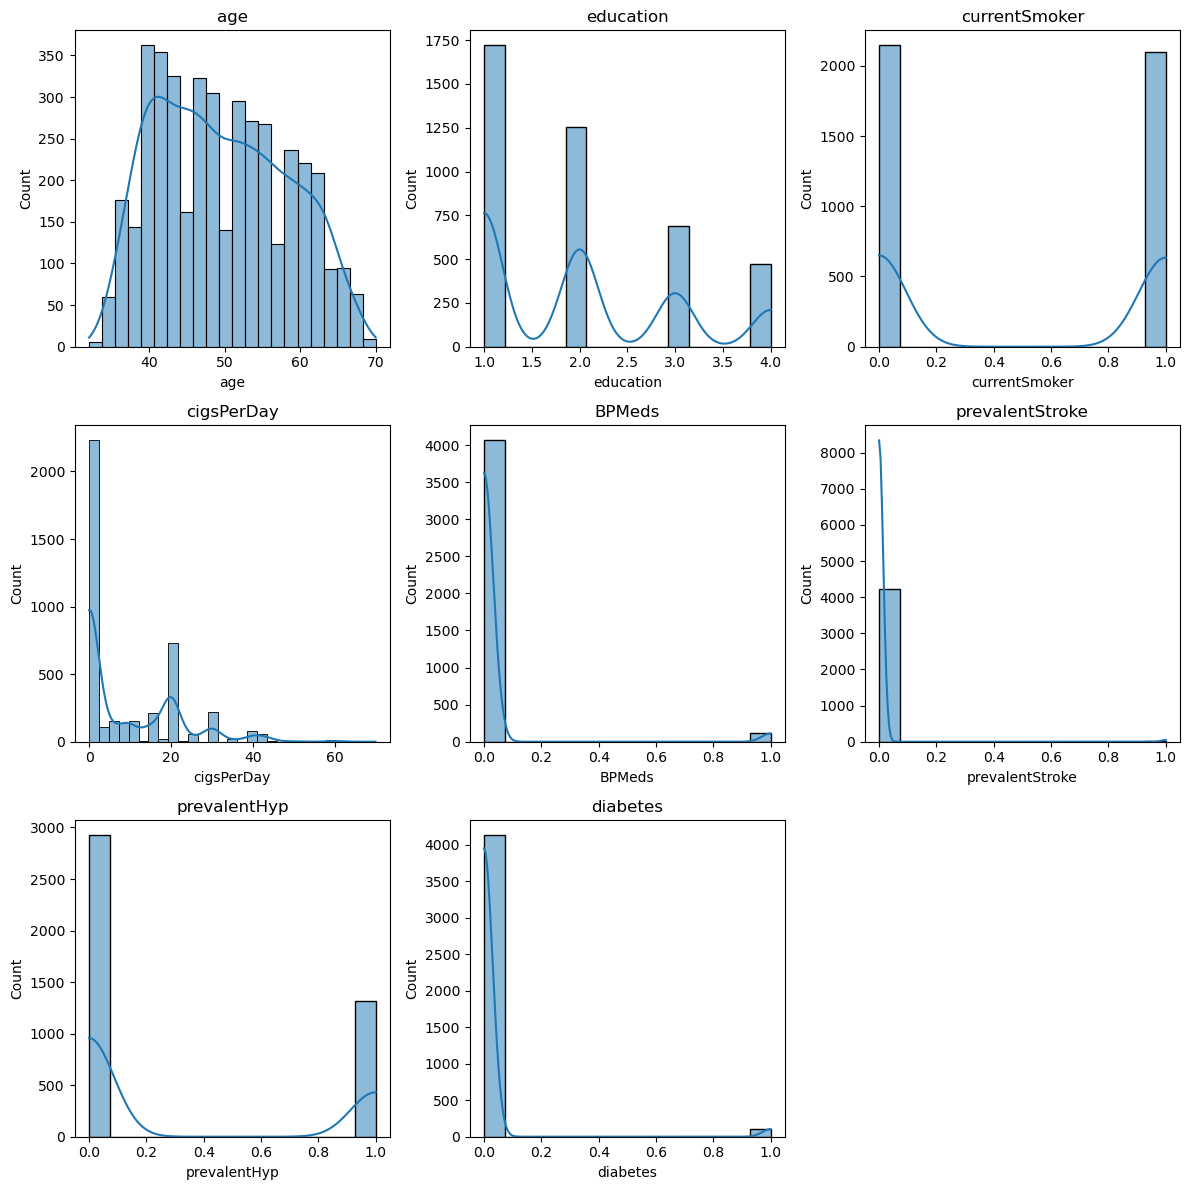

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_plot = ['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
plt.figure(figsize=(12, 12))
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(col) 

plt.tight_layout() 
plt.show()


In [217]:
df.shape

(4240, 16)

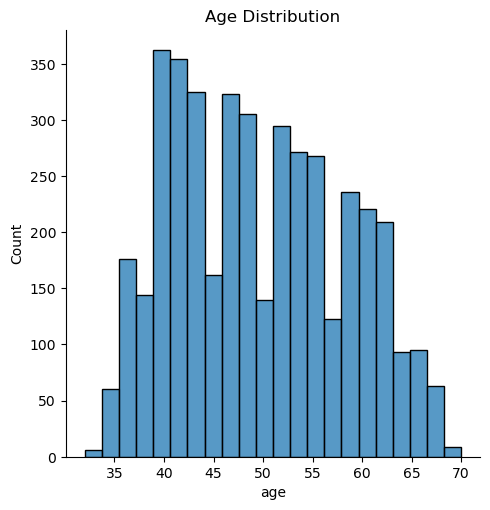

In [218]:
sns.displot(df['age'])
plt.title("Age Distribution")
plt.show()

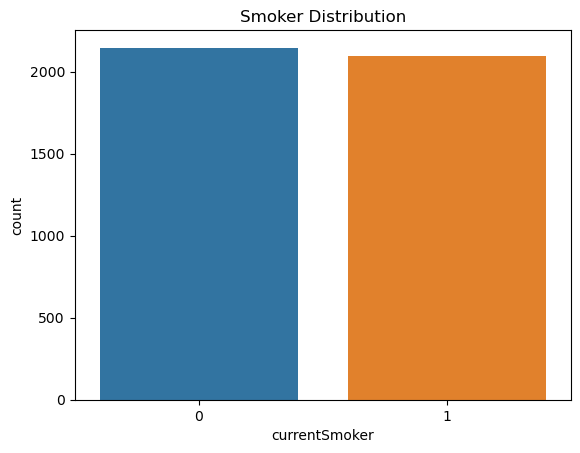

In [219]:
sns.countplot(x='currentSmoker',data=df)
plt.title("Smoker Distribution")
plt.show()

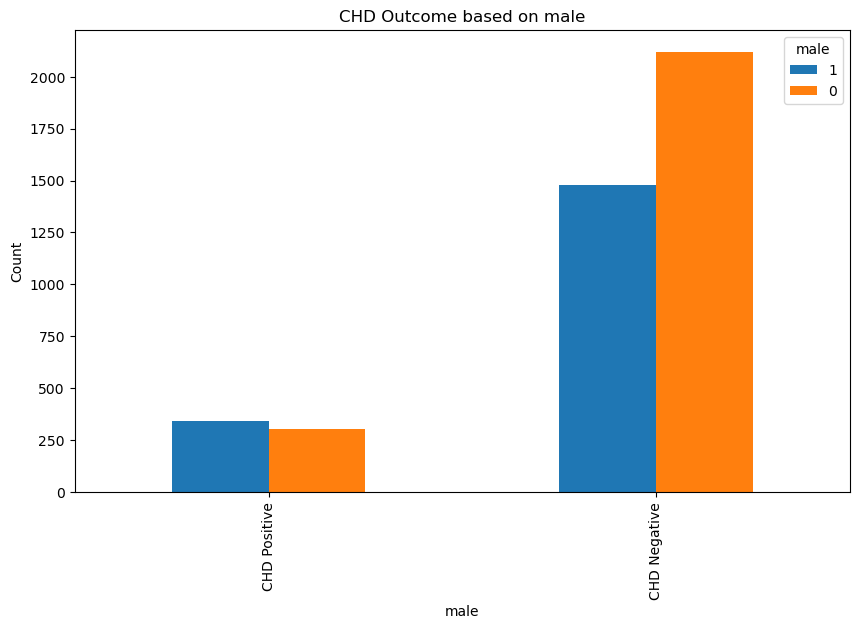

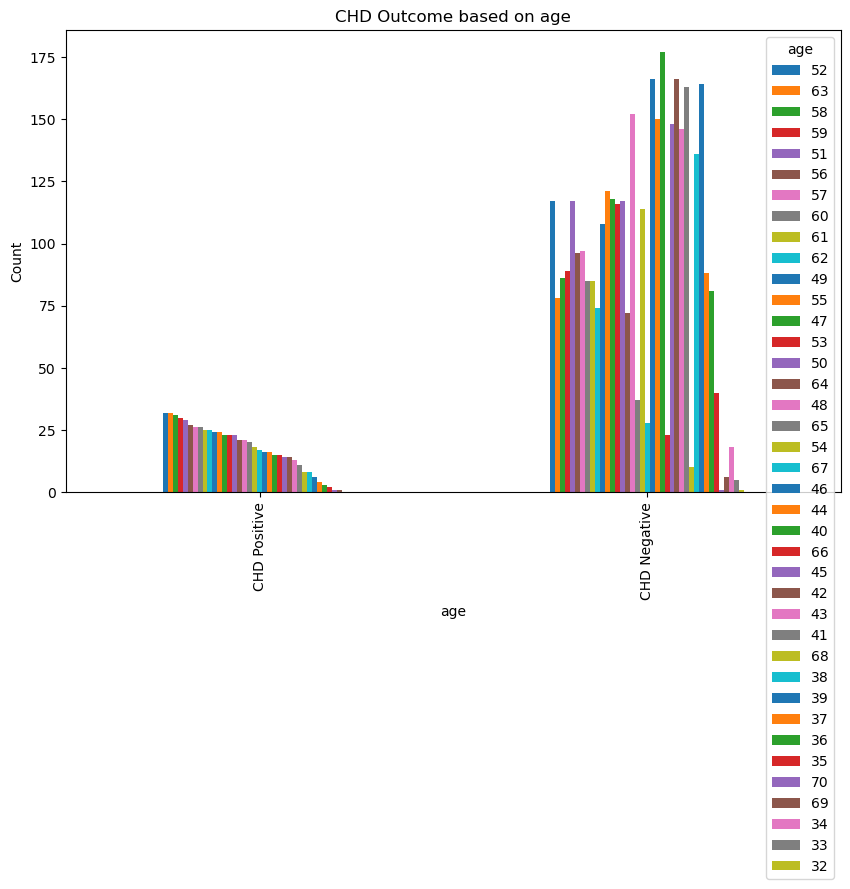

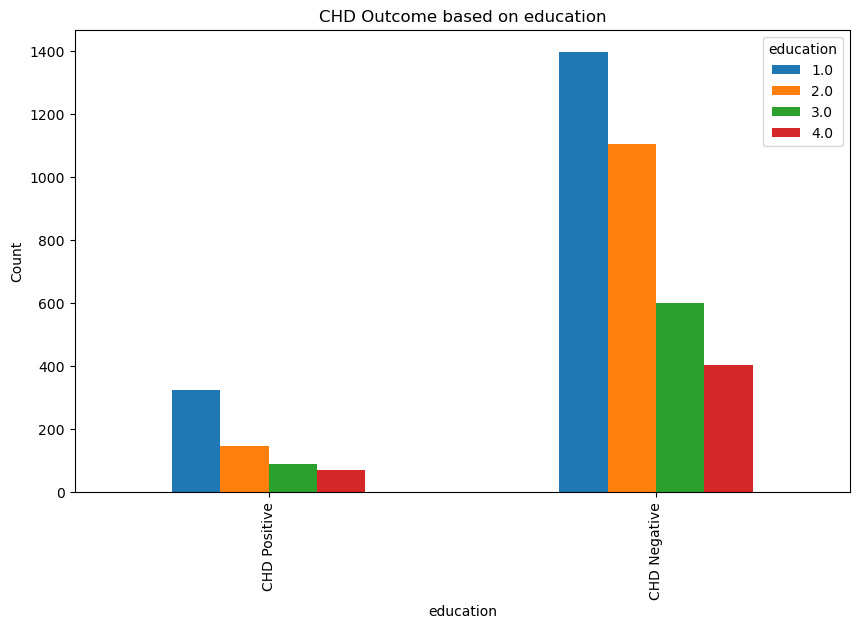

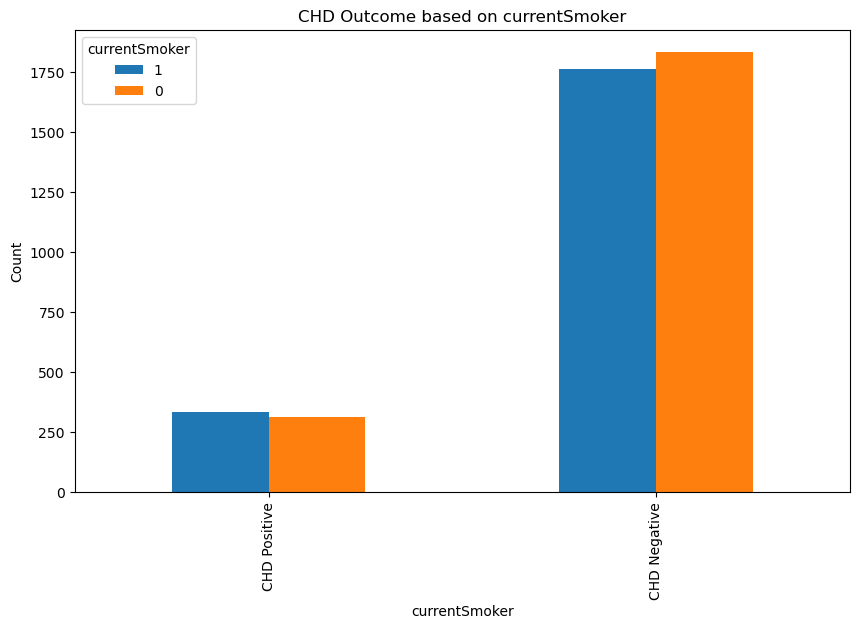

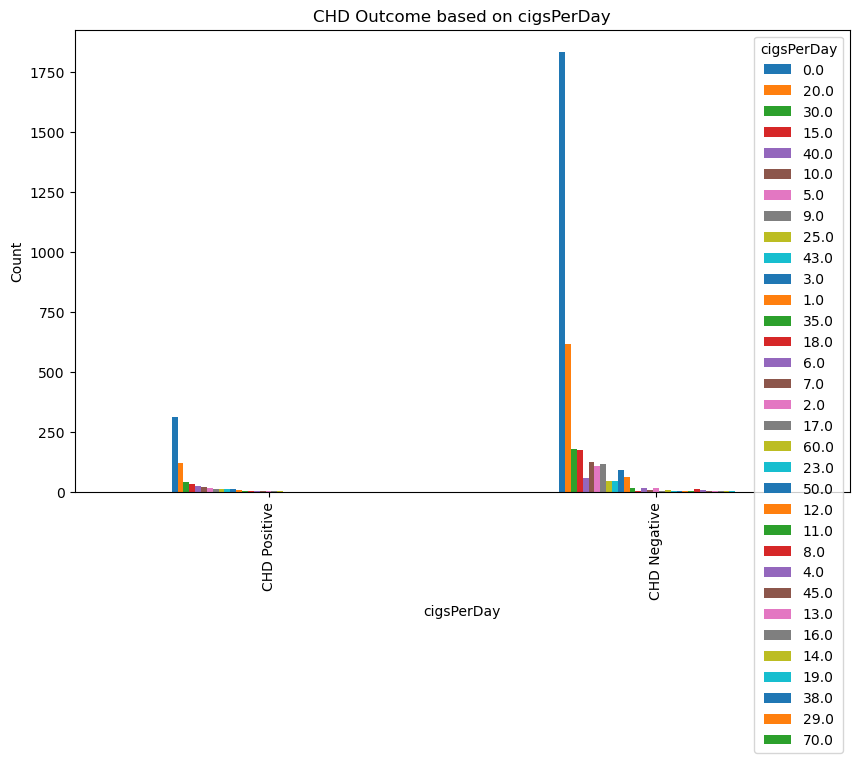

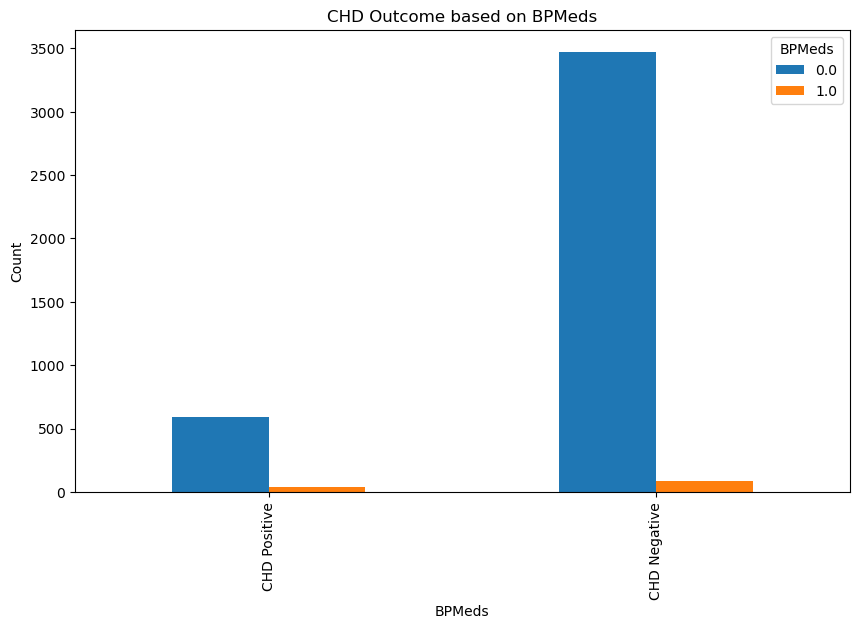

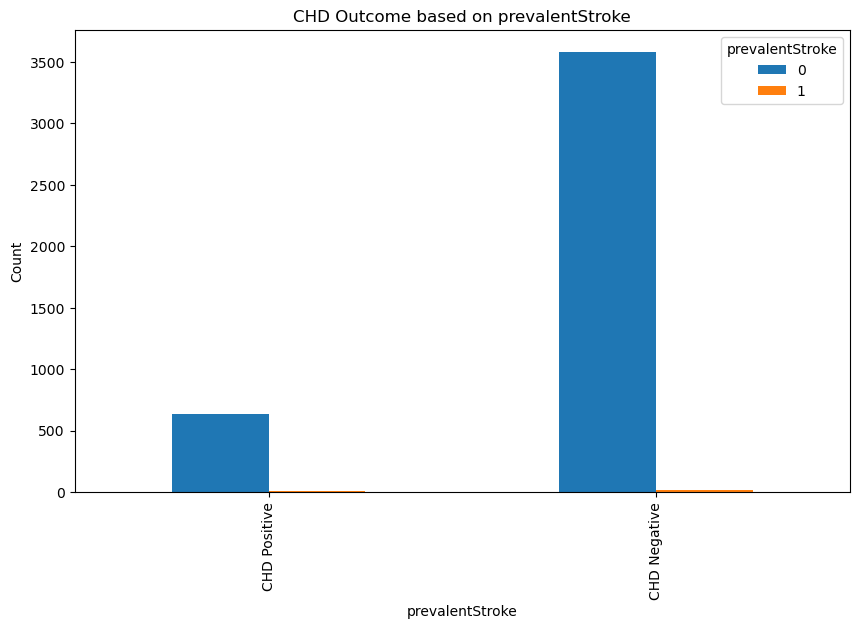

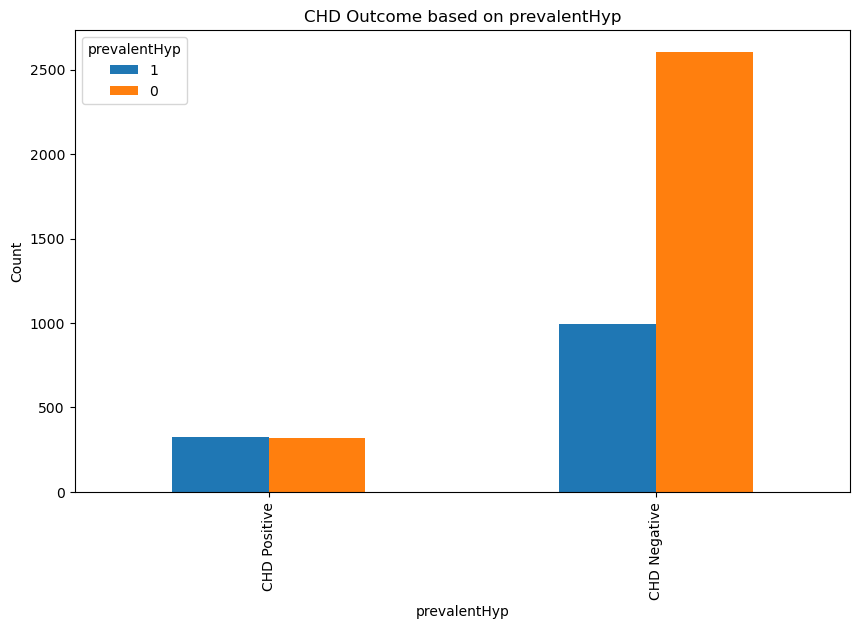

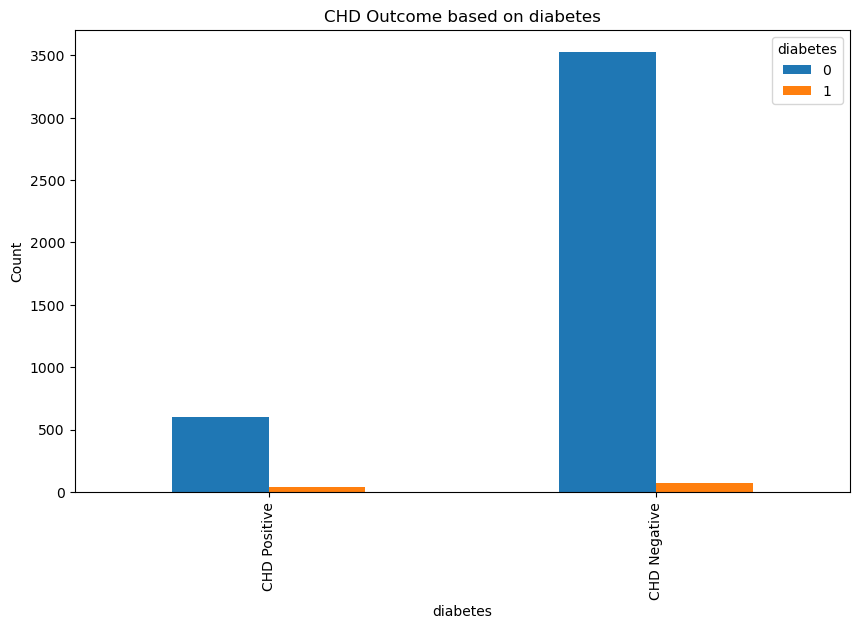

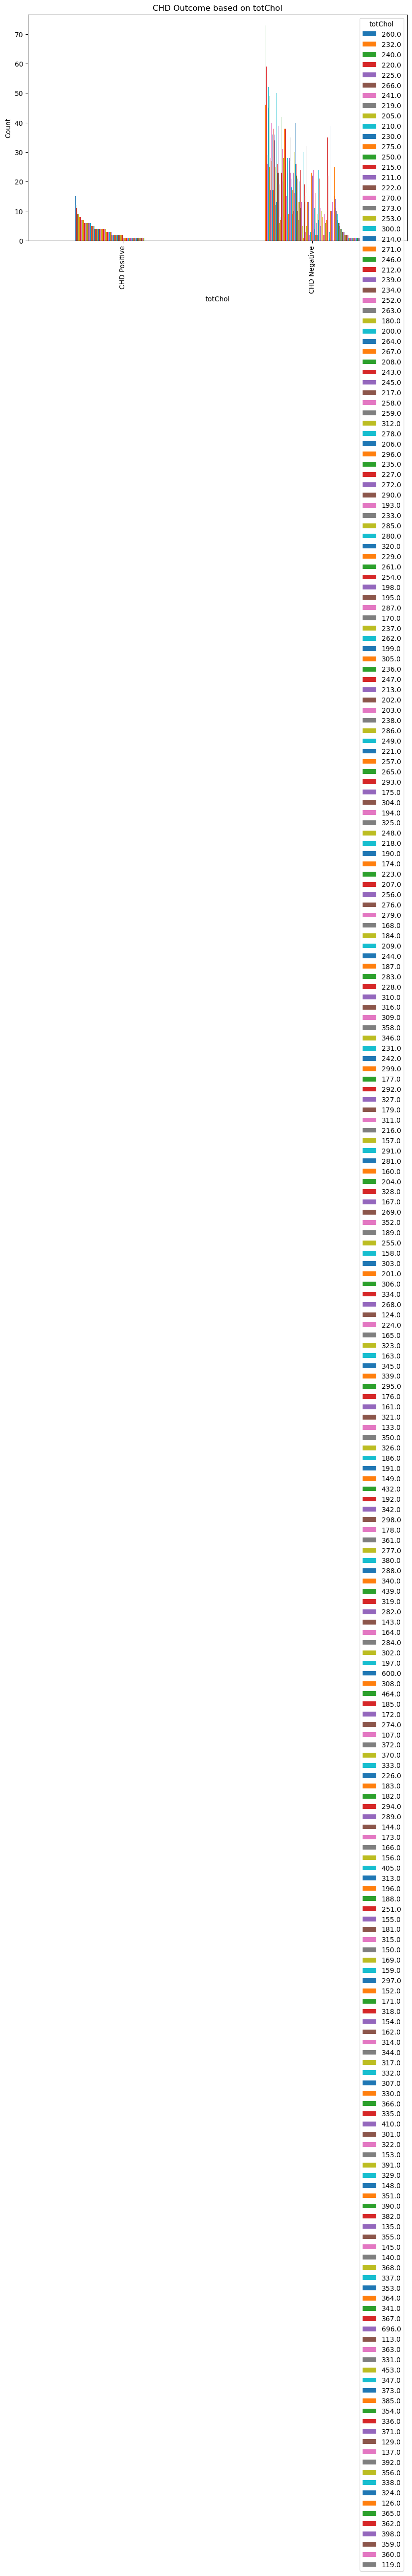

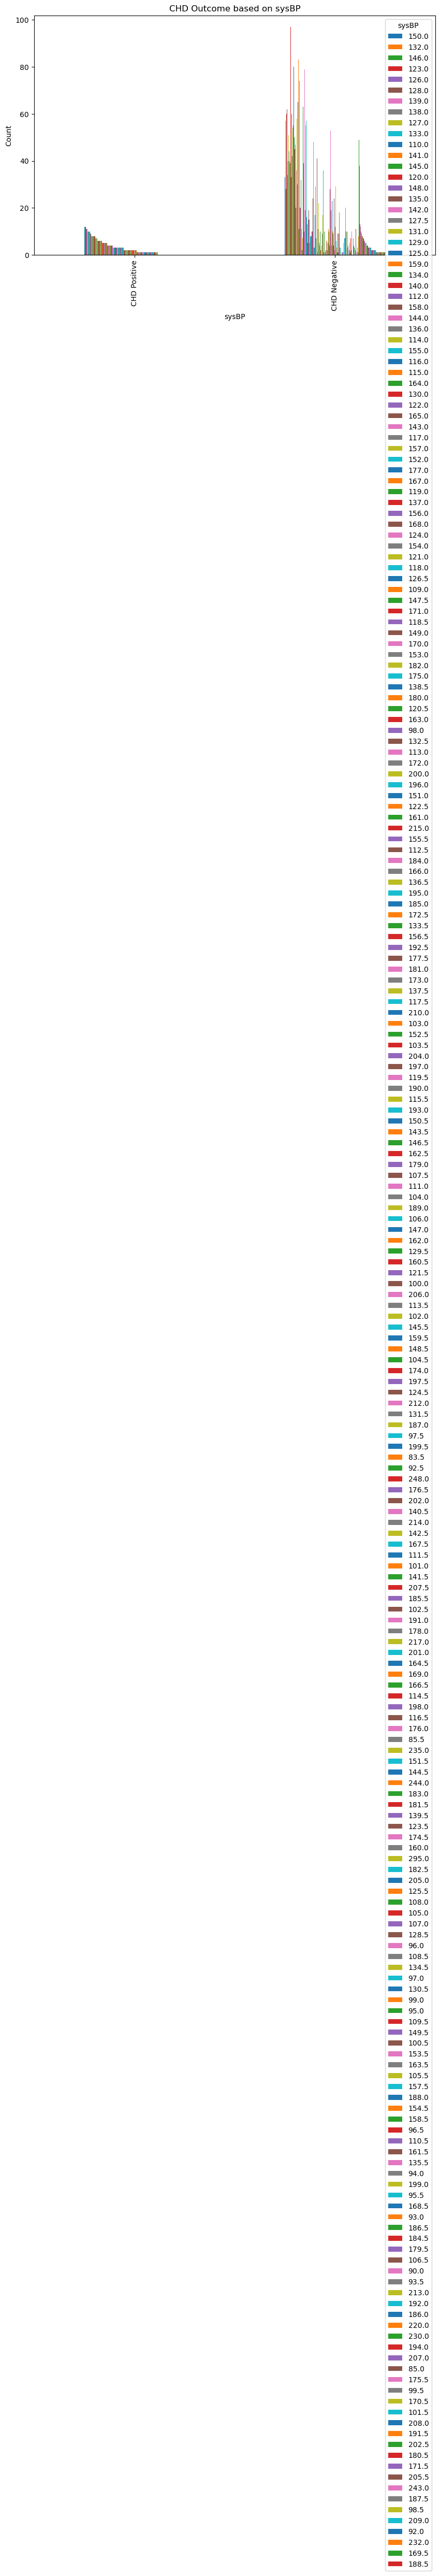

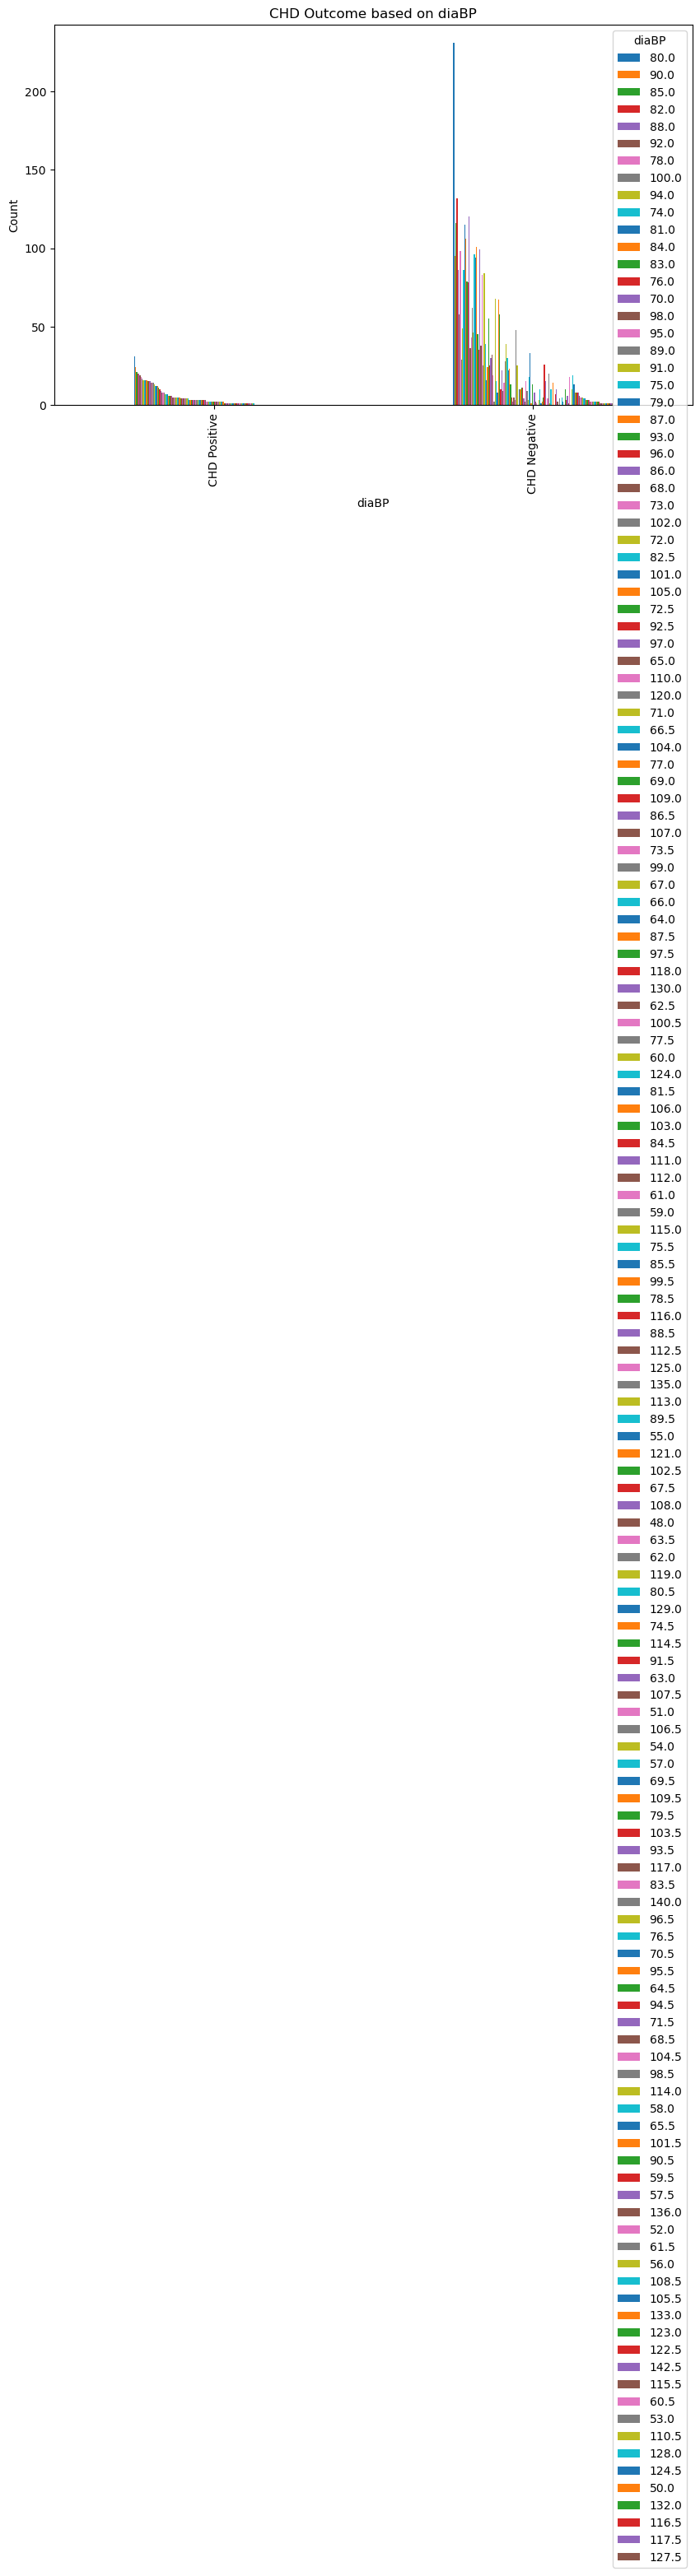

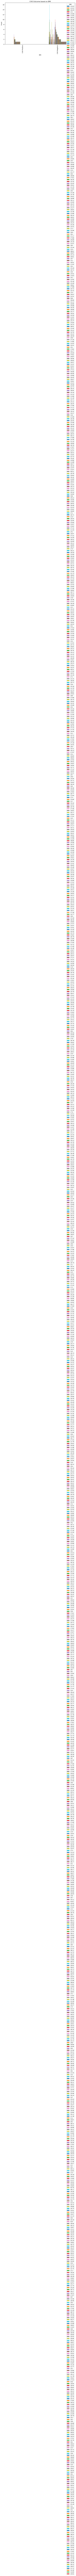

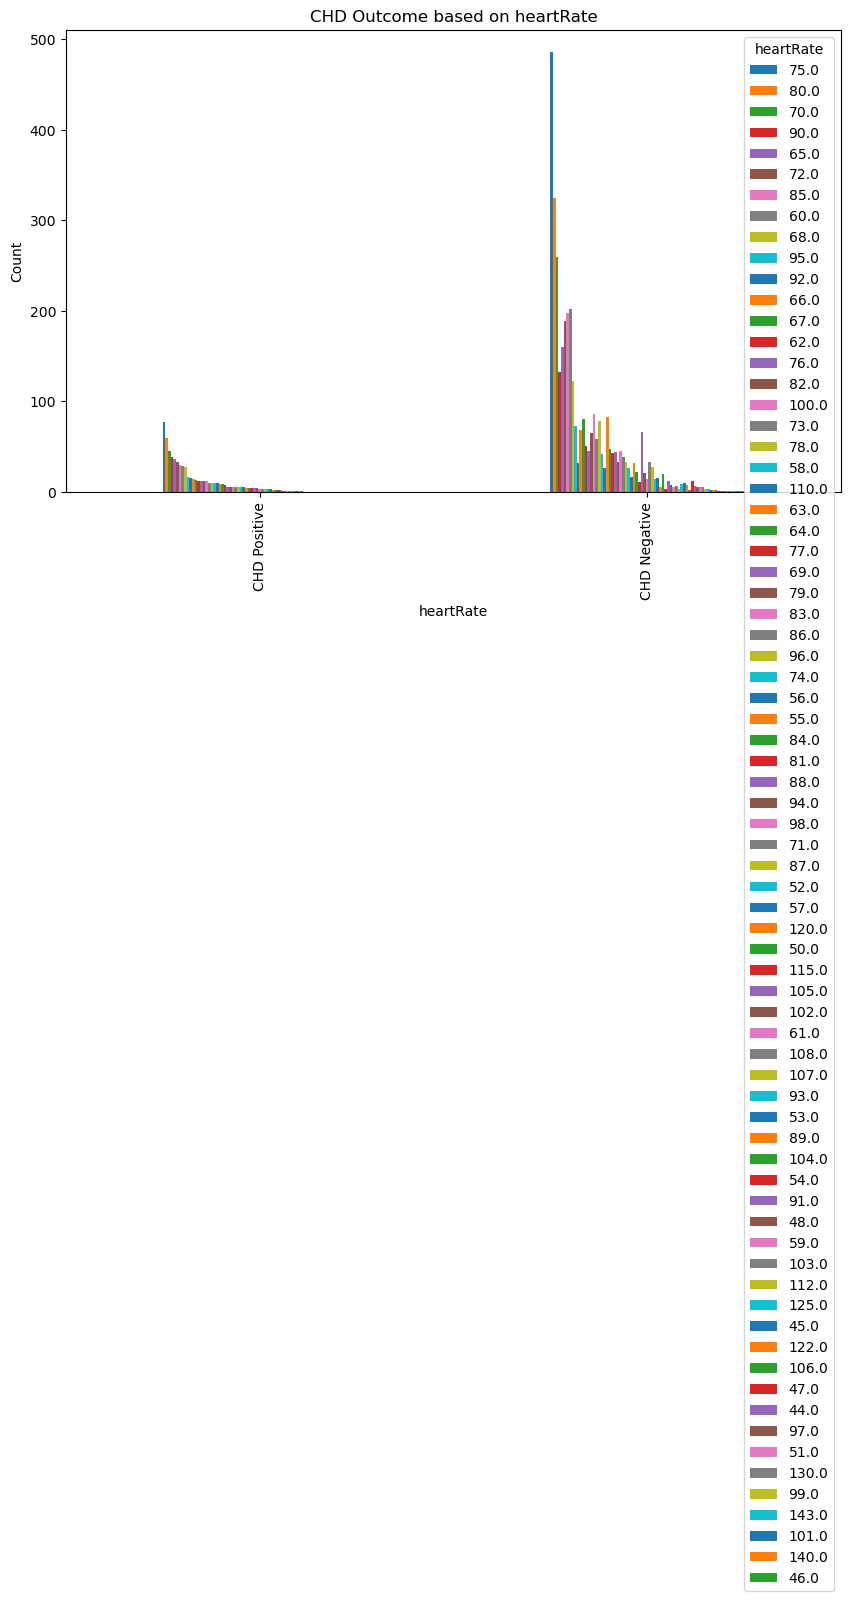

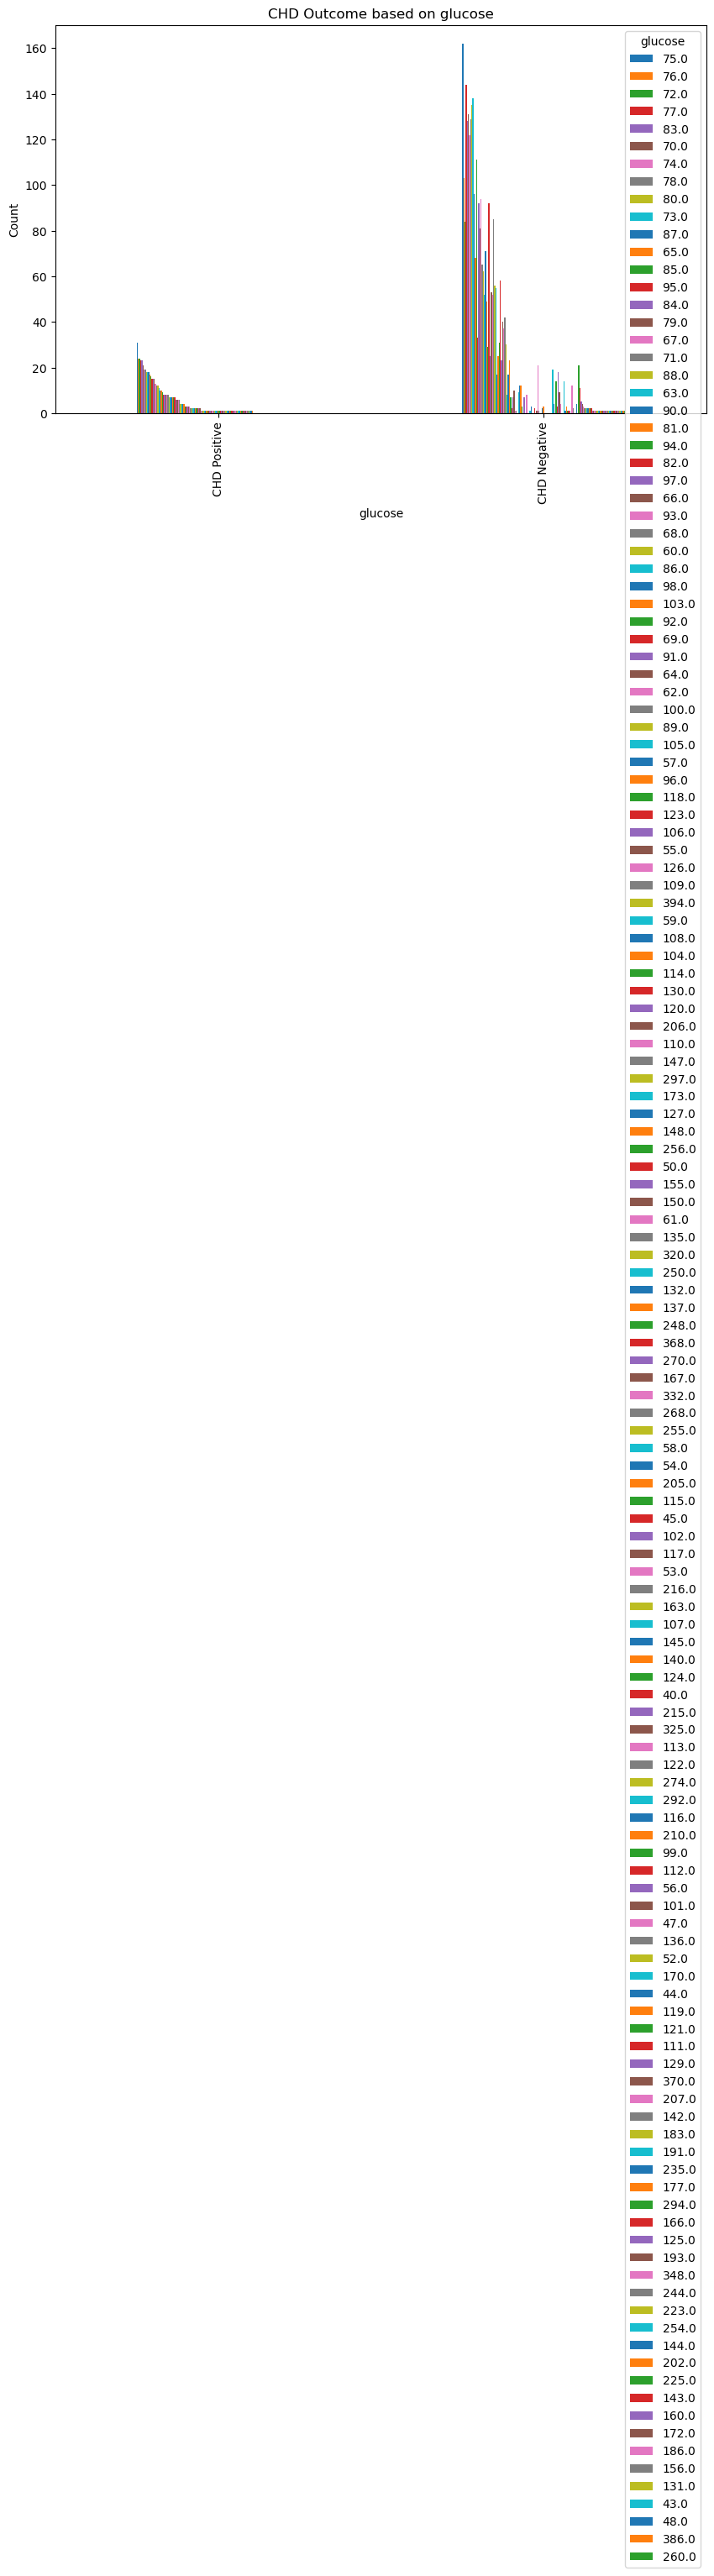

In [220]:
def bar_chart(col):
    Approved = df[df["TenYearCHD"]==1][col].value_counts()
    Disapproved = df[df["TenYearCHD"]==0][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["CHD Positive", "CHD Negative"]
    df1.plot(kind="bar", figsize=(10, 6))  # Adjust the figure size as needed
    plt.title(f'CHD Outcome based on {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Example usage
bar_chart("male")  # Adjust the column name as needed
bar_chart("age")
bar_chart("education")
bar_chart("currentSmoker")
bar_chart("cigsPerDay")
bar_chart("BPMeds")
bar_chart("prevalentStroke")
bar_chart("prevalentHyp")
bar_chart("diabetes")
bar_chart("totChol")
bar_chart("sysBP")
bar_chart("diaBP")
bar_chart("BMI")
bar_chart("heartRate")
bar_chart("glucose")


In [221]:
df.isnull()

male    age  education  currentSmoker  cigsPerDay  BPMeds  \
0     False  False      False          False       False   False   
1     False  False      False          False       False   False   
2     False  False      False          False       False   False   
3     False  False      False          False       False   False   
4     False  False      False          False       False   False   
...     ...    ...        ...            ...         ...     ...   
4235  False  False      False          False       False    True   
4236  False  False      False          False       False   False   
4237  False  False      False          False       False   False   
4238  False  False      False          False       False   False   
4239  False  False      False          False       False   False   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0               False         False     False    False  False  False  False   
1               False         False     False    False  False  False  False   
2               False         False     False    False  False  False  False   
3               False         False     False    False  False  False  False   
4               False         False     False    False  False  False  False   
...               ...           ...       ...      ...    ...    ...    ...   
4235            False         False     False    False  False  False  False   
4236            False         False     False    False  False  False  False   
4237            False         False     False    False  False  False  False   
4238            False         False     False    False  False  False  False   
4239            False         False     False    False  False  False  False   

      heartRate  glucose  TenYearCHD  
0         False    False       False  
1         False    False       False  
2         False    False       False  
3         False    False       False  
4         False    False       False  
...         ...      ...         ...  
4235      False    False       False  
4236      False     True       False  
4237      False    False       False  
4238      False    False       False  
4239      False    False       False  

[4240 rows x 16 columns]

<Axes: >

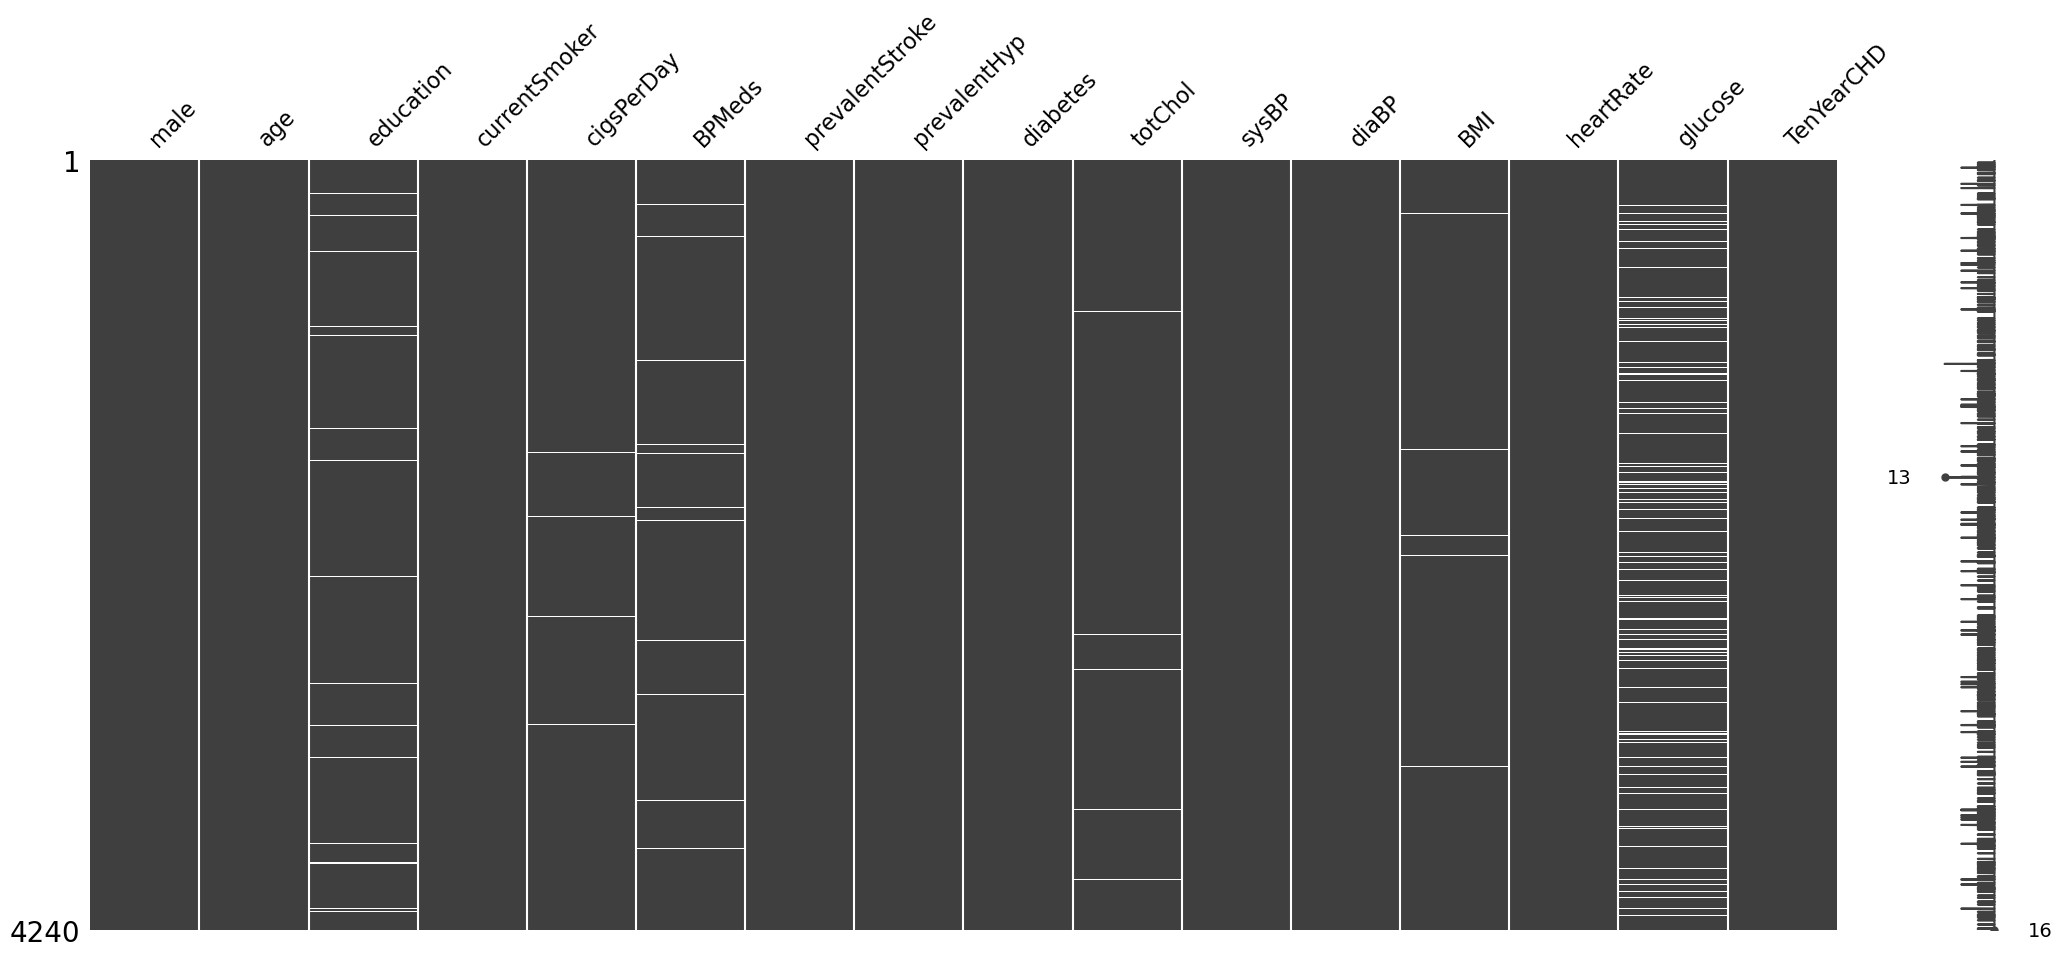

In [222]:
import missingno as msno
msno.matrix(df)

<Axes: >

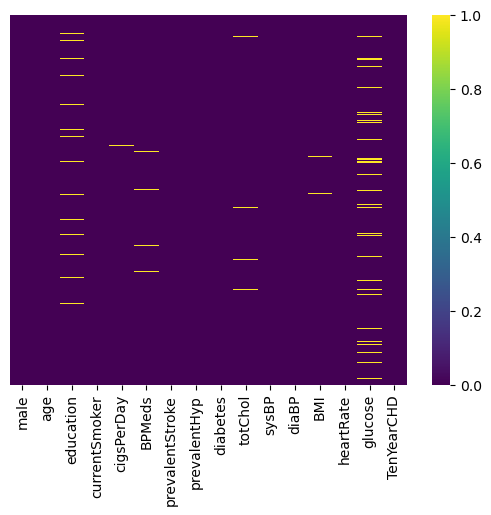

In [223]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [224]:
df.fillna(df.mean(), inplace=True)
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

<Axes: >

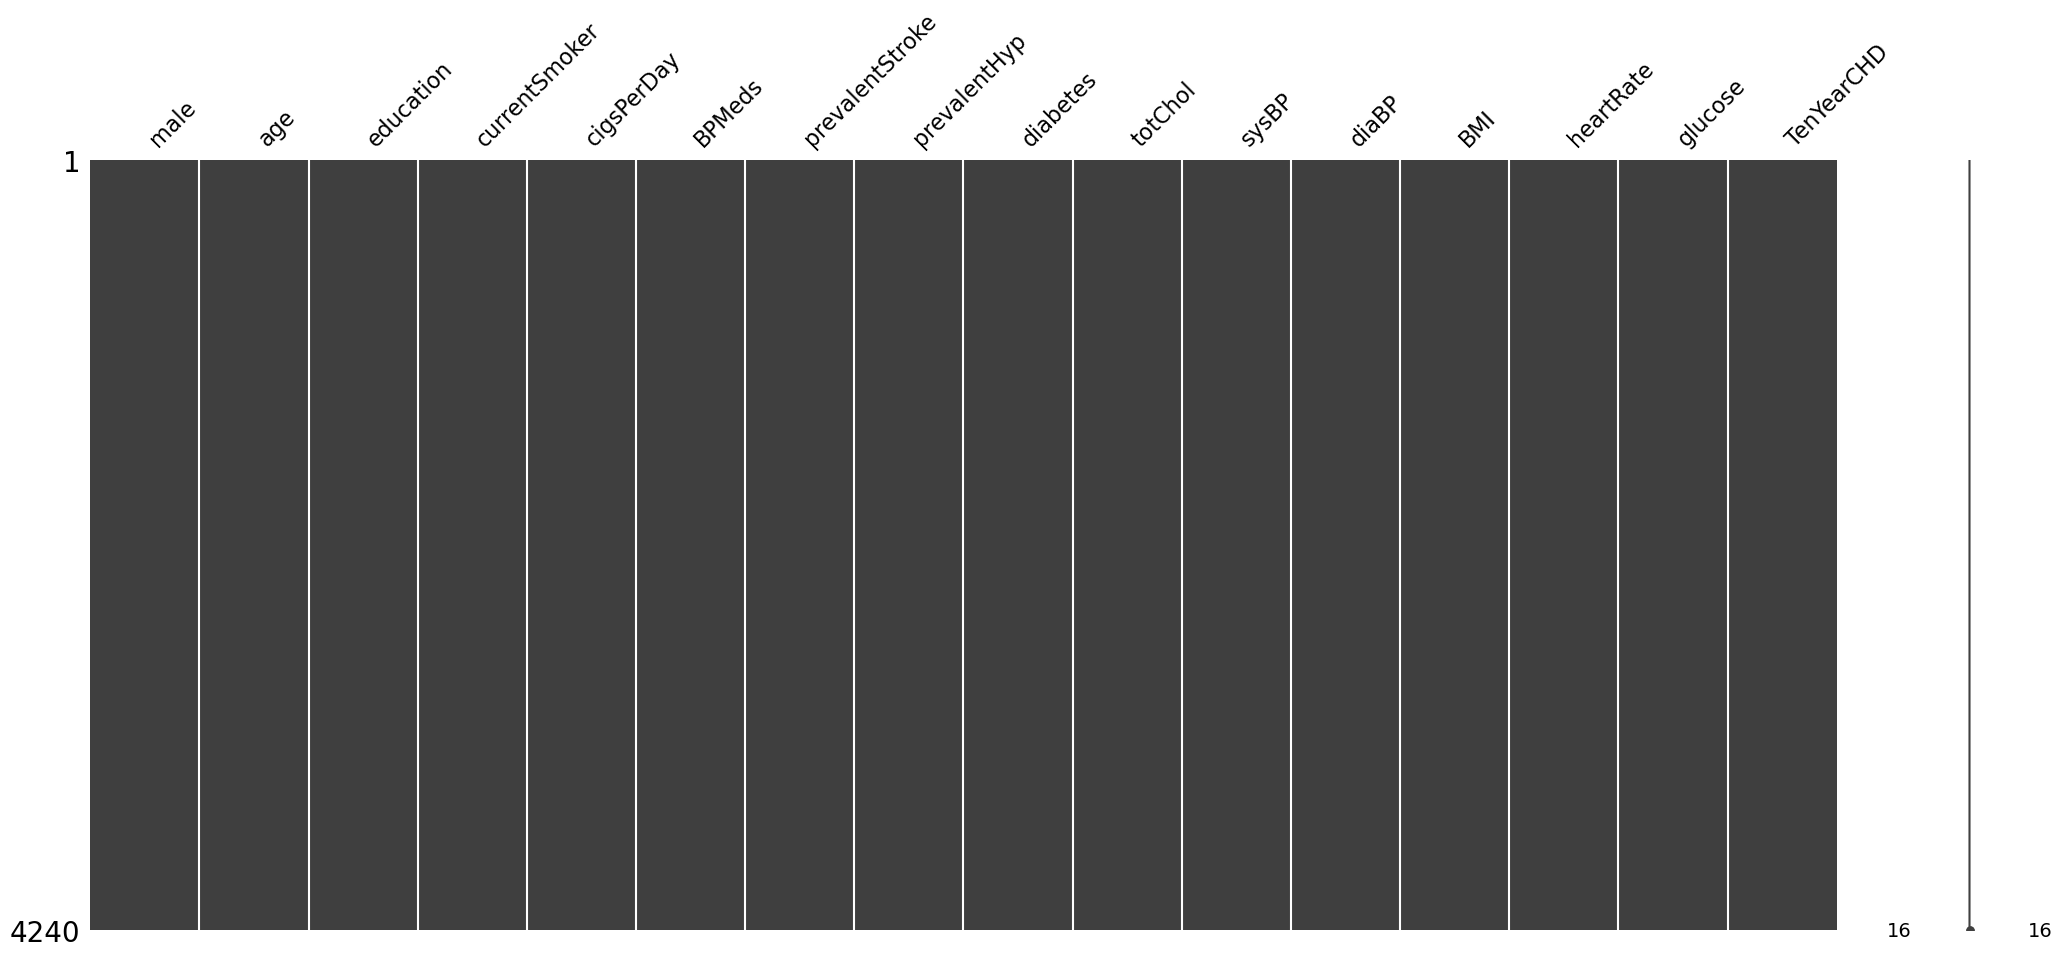

In [225]:
msno.matrix(df)

<Axes: >

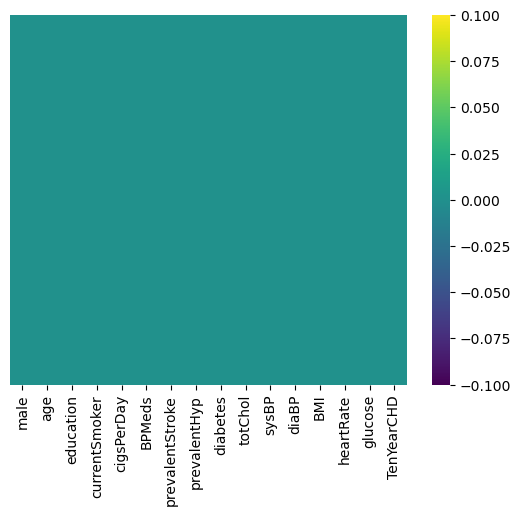

In [226]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

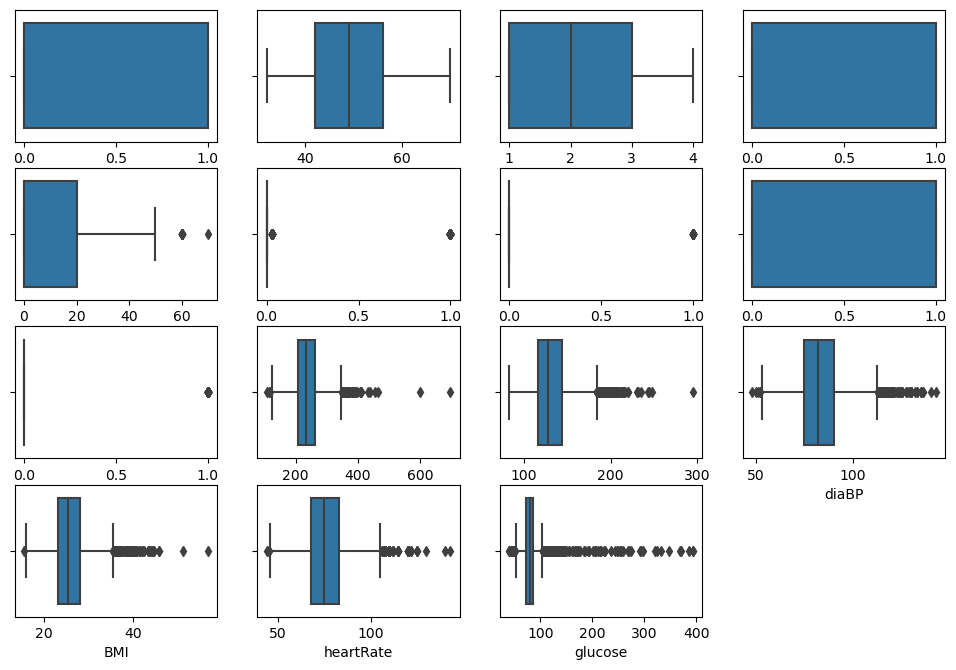

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,12))
for i,col in enumerate(['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']):
  plt.subplot(6,4,i+1)
  sns.boxplot(x=col,data=df)
plt.show()

In [228]:
from scipy import stats
attributes_with_outliers = ['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
def remove_outliers_zscore(df, attributes):
    for attr in attributes:
        z_scores = stats.zscore(df[attr])
        df = df[(z_scores < 3) & (z_scores > -3)]
    return df
data= remove_outliers_zscore(df, attributes_with_outliers)

In [229]:
df.shape,data.shape 

((4240, 16), (3767, 16))

In [230]:
correlation_matrix =df.corr()
correlation_matrix

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029014   0.017188       0.197026    0.316023   
age             -0.029014  1.000000  -0.164081      -0.213662   -0.192534   
education        0.017188 -0.164081   1.000000       0.018297    0.008197   
currentSmoker    0.197026 -0.213662   0.018297       1.000000    0.767055   
cigsPerDay       0.316023 -0.192534   0.008197       0.767055    1.000000   
BPMeds          -0.052203  0.122036  -0.010689      -0.048621   -0.045847   
prevalentStroke -0.004550  0.057679  -0.035139      -0.032980   -0.032711   
prevalentHyp     0.005853  0.306799  -0.080753      -0.103710   -0.066444   
diabetes         0.015693  0.101314  -0.038214      -0.044285   -0.037086   
totChol         -0.070064  0.260691  -0.022993      -0.046211   -0.026182   
sysBP           -0.035879  0.394053  -0.128126      -0.130281   -0.088523   
diaBP            0.058199  0.205586  -0.061362      -0.107933   -0.056473   
BMI              0.081705  0.135578  -0.135876      -0.167483   -0.092888   
heartRate       -0.116913 -0.012839  -0.053603       0.062678    0.075257   
glucose          0.005718  0.116951  -0.033837      -0.054062   -0.056020   
TenYearCHD       0.088374  0.225408  -0.053571       0.019448    0.057646   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052203        -0.004550      0.005853  0.015693 -0.070064   
age              0.122036         0.057679      0.306799  0.101314  0.260691   
education       -0.010689        -0.035139     -0.080753 -0.038214 -0.022993   
currentSmoker   -0.048621        -0.032980     -0.103710 -0.044285 -0.046211   
cigsPerDay      -0.045847        -0.032711     -0.066444 -0.037086 -0.026182   
BPMeds           1.000000         0.115008      0.259125  0.051584  0.078973   
prevalentStroke  0.115008         1.000000      0.074791  0.006955  0.000105   
prevalentHyp     0.259125         0.074791      1.000000  0.077752  0.162683   
diabetes         0.051584         0.006955      0.077752  1.000000  0.040161   
totChol          0.078973         0.000105      0.162683  0.040161  1.000000   
sysBP            0.252023         0.057000      0.696656  0.111265  0.207436   
diaBP            0.192387         0.045153      0.615840  0.050260  0.163423   
BMI              0.099586         0.024856      0.300599  0.086282  0.115013   
heartRate        0.015172        -0.017674      0.146777  0.048986  0.090678   
glucose          0.048925         0.018065      0.082757  0.605709  0.044710   
TenYearCHD       0.086805         0.061823      0.177458  0.097344  0.081807   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.035879  0.058199  0.081705  -0.116913  0.005718    0.088374  
age              0.394053  0.205586  0.135578  -0.012839  0.116951    0.225408  
education       -0.128126 -0.061362 -0.135876  -0.053603 -0.033837   -0.053571  
currentSmoker   -0.130281 -0.107933 -0.167483   0.062678 -0.054062    0.019448  
cigsPerDay      -0.088523 -0.056473 -0.092888   0.075257 -0.056020    0.057646  
BPMeds           0.252023  0.192387  0.099586   0.015172  0.048925    0.086805  
prevalentStroke  0.057000  0.045153  0.024856  -0.017674  0.018065    0.061823  
prevalentHyp     0.696656  0.615840  0.300599   0.146777  0.082757    0.177458  
diabetes         0.111265  0.050260  0.086282   0.048986  0.605709    0.097344  
totChol          0.207436  0.163423  0.115013   0.090678  0.044710    0.081807  
sysBP            1.000000  0.783952  0.325172   0.182084  0.134561    0.216374  
diaBP            0.783952  1.000000  0.376317   0.181012  0.058499    0.145112  
BMI              0.325172  0.376317  1.000000   0.067318  0.082123    0.074788  
heartRate        0.182084  0.181012  0.067318   1.000000  0.089386    0.022892  
glucose          0.134561  0.058499  0.082123   0.089386  1.000000    0.120451  
TenYearCHD       0.216374  0.145112  0.074788   0.0228

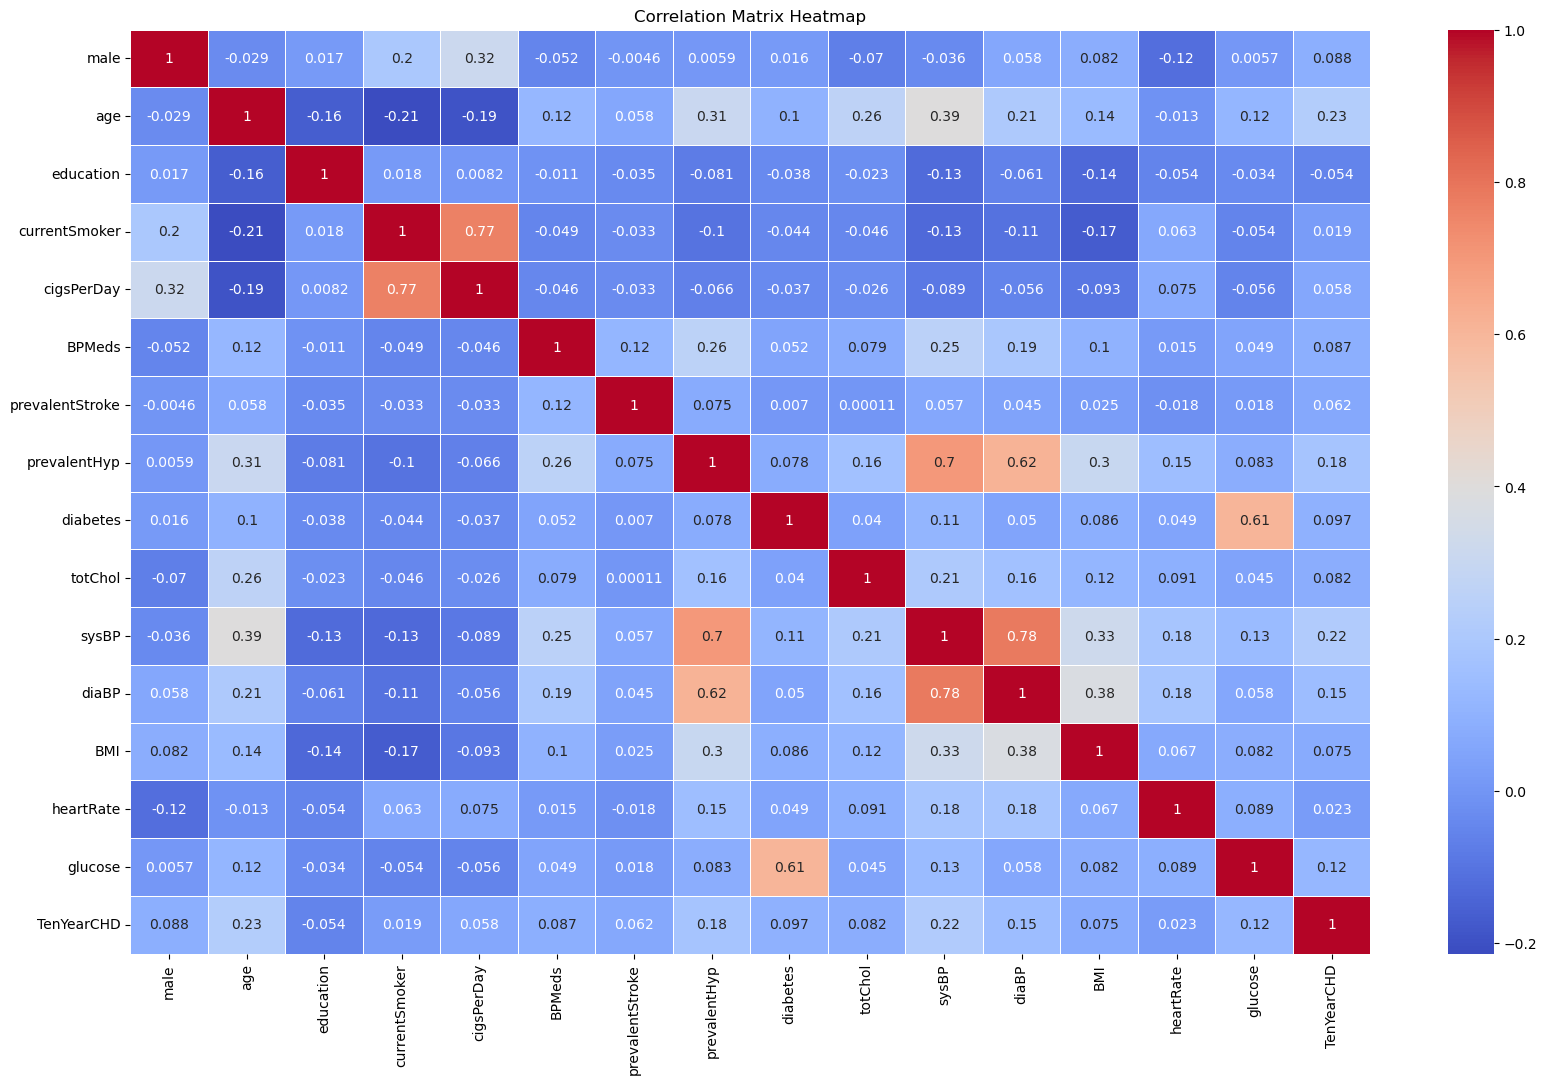

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [232]:
from sklearn.model_selection import train_test_split
X=data.drop("TenYearCHD",axis=1)
y=data["TenYearCHD"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2636, 15)
Shape of X_test: (1131, 15)
Shape of y_train: (2636,)
Shape of y_test: (1131,)


In [233]:
X

male  age  education  currentSmoker  cigsPerDay    BPMeds  \
0        1   39        4.0              0         0.0  0.000000   
1        0   46        2.0              0         0.0  0.000000   
2        1   48        1.0              1        20.0  0.000000   
3        0   61        3.0              1        30.0  0.000000   
4        0   46        3.0              1        23.0  0.000000   
...    ...  ...        ...            ...         ...       ...   
4235     0   48        2.0              1        20.0  0.029615   
4236     0   44        1.0              1        15.0  0.000000   
4237     0   52        2.0              0         0.0  0.000000   
4238     1   40        3.0              0         0.0  0.000000   
4239     0   39        3.0              1        30.0  0.000000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate     glucose  
0          80.0   77.000000  
1          95.0   76.000000  
2          75.0   70.000000  
3          65.0  103.000000  
4          85.0   85.000000  
...         ...         ...  
4235       84.0   86.000000  
4236       86.0   81.963655  
4237       80.0  107.000000  
4238       67.0   72.000000  
4239       85.0   80.000000  

[3767 rows x 15 columns]

In [234]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Sensitivity: 0.23448275862068965
Specificity: 0.8945233265720081
Accuracy: 0.8099027409372237
F1 Score: 0.24028268551236748
Precision: 0.2463768115942029
Negative Predicted Rate: 0.8882175226586103
False Negative Rate: 0.7655172413793103
False Positive Rate: 0.10547667342799188
False Discovery Rate: 0.7536231884057971
False Omission Rate: 0.11178247734138973


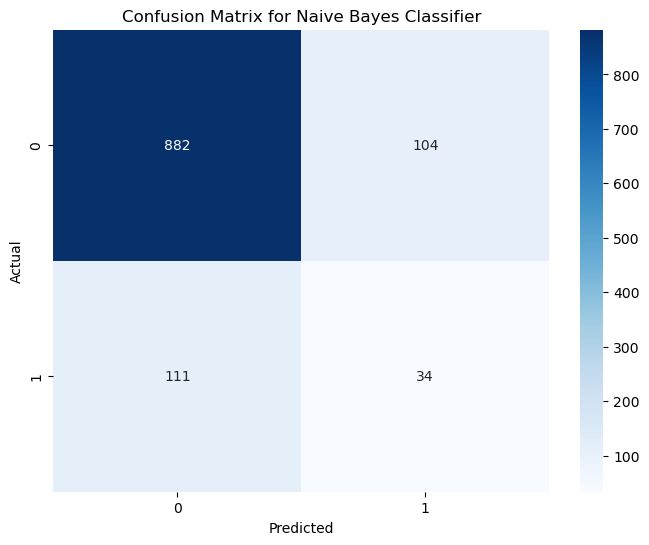

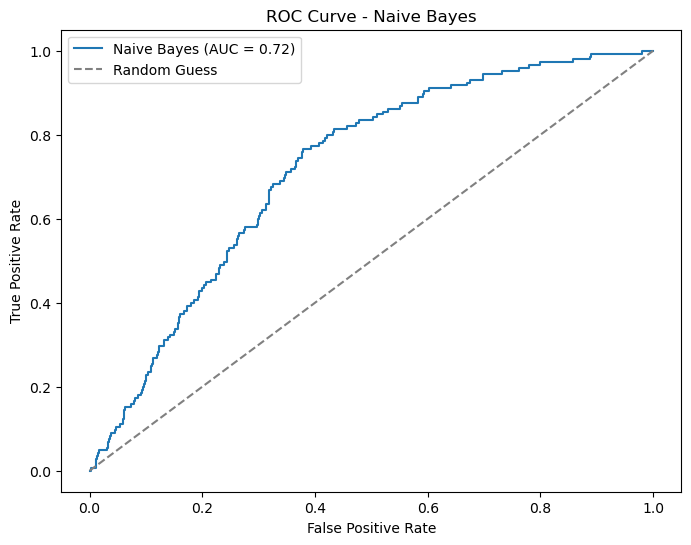


Cross-validated AUC scores: [0.68106675 0.67210936 0.61613189 0.68245681 0.71394216]
Mean AUC score: 0.6731413924977623

Cross-validated Accuracy scores: [0.83522727 0.82922201 0.78368121 0.82542694 0.81404175]
Mean Accuracy score: 0.8175198378471624

Cross-validated Precision scores: [0.32653061 0.30188679 0.20779221 0.30508475 0.28985507]
Mean Precision score: 0.28622988614328315

Cross-validated Recall scores: [0.22857143 0.23188406 0.23188406 0.26086957 0.28985507]
Mean Recall score: 0.24861283643892337

Cross-validated F1 scores: [0.26890756 0.26229508 0.21917808 0.28125    0.28985507]
Mean F1 score: 0.2642971599295944

Cross-validated False Positive Rate (FPR) scores: [0.68106675 0.67210936 0.61613189 0.68245681 0.71394216]
Mean FPR score: 0.6731413924977623

Cross-validated FNR scores: [0.77142857 0.76811594 0.76811594 0.73913043 0.71014493]
Mean FNR score: 0.7513871635610767

Cross-validated Sensitivity scores: [0.22857143 0.23188406 0.23188406 0.26086957 0.28985507]
Mean Sens

In [235]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
results_list = []

def append_results(data, classifier, train_accuracy, test_accuracy,cv_auc_scores, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy,'cross_val_mean':cv_auc_scores, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

nb_train_predictions = naive_bayes_model.predict(X_train)
nb_test_predictions = naive_bayes_model.predict(X_test)

nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
nb_test_conf_matrix = confusion_matrix(y_test, nb_test_predictions)
nb_test_probabilities = naive_bayes_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, nb_test_probabilities)

tn, fp, fn, tp = nb_test_conf_matrix.ravel()
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))


plt.figure(figsize=(8, 6))
sns.heatmap(nb_test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, nb_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

 
def fnr_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fnr = fn / (fn + tp)
    return fnr


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sensitivity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[1, 1] / (confusion_matrix(y, y_pred)[1, 1] + confusion_matrix(y, y_pred)[1, 0]))
specificity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[0, 0] / (confusion_matrix(y, y_pred)[0, 0] + confusion_matrix(y, y_pred)[0, 1]))
cv_auc_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring='roc_auc')
cv_accuracy_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring='accuracy')
cv_precision_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring='precision')
cv_recall_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring='recall')
cv_f1_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring='f1')
cv_fpr_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
cv_fnr_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring=make_scorer(fnr_scorer))
cv_sensitivity_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring=sensitivity_scorer)
cv_specificity_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=kfold, scoring=specificity_scorer)


print("\nCross-validated AUC scores:", cv_auc_scores)
print("Mean AUC score:", cv_auc_scores.mean())
print("\nCross-validated Accuracy scores:", cv_accuracy_scores)
print("Mean Accuracy score:", cv_accuracy_scores.mean())
print("\nCross-validated Precision scores:", cv_precision_scores)
print("Mean Precision score:", cv_precision_scores.mean())
print("\nCross-validated Recall scores:", cv_recall_scores)
print("Mean Recall score:", cv_recall_scores.mean())
print("\nCross-validated F1 scores:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean())
print("\nCross-validated False Positive Rate (FPR) scores:", cv_fpr_scores)
print("Mean FPR score:", cv_fpr_scores.mean())
print("\nCross-validated FNR scores:", cv_fnr_scores)
print("Mean FNR score:", np.mean(cv_fnr_scores))
print("\nCross-validated Sensitivity scores:", cv_sensitivity_scores)
print("Mean Sensitivity score:", cv_sensitivity_scores.mean())
print("\nCross-validated Specificity scores:", cv_specificity_scores)
print("Mean Specificity score:", cv_specificity_scores.mean())

append_results('withoutsmote', 'Naive Bayes CV', nb_train_accuracy * 100, nb_test_accuracy * 100, cv_auc_scores.mean() * 100, auc_score,
               cv_sensitivity_scores.mean(), cv_specificity_scores.mean(),cv_f1_scores.mean()
             , cv_precision_scores.mean(),
               np.mean(tn / (tn + fn)),np.mean(cv_fnr_scores),
               cv_fpr_scores.mean(), (fp / (fp + tp)),
               (fn / (fn + tn)))


results_df = pd.DataFrame(results_list)

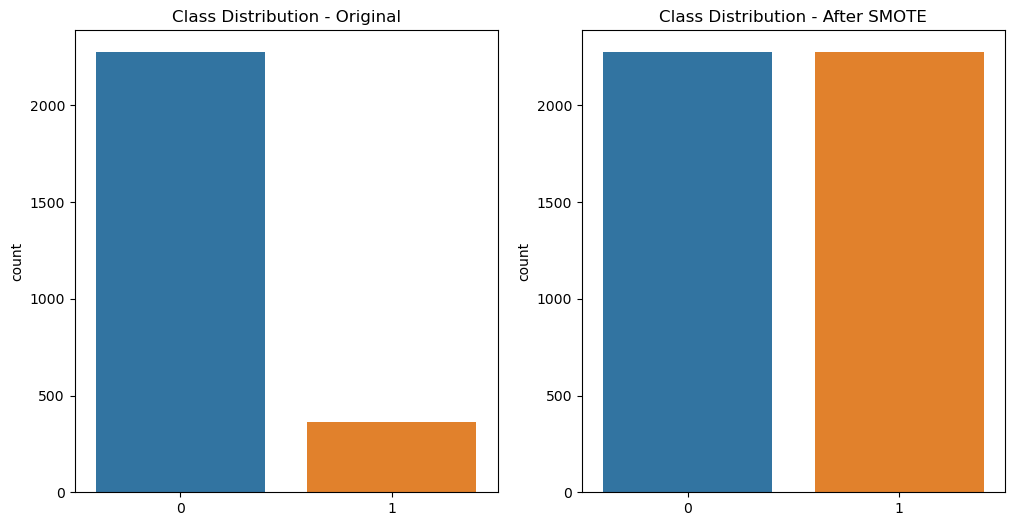


Naive Bayes Metrics on Test Set:
Sensitivity: 0.5615384615384615
Specificity: 0.6773226773226774
Accuracy: 0.6640141467727675
F1 Score: 0.27756653992395436
Precision: 0.18434343434343434
Negative Predicted Rate: 0.9224489795918367
False Negative Rate: 0.43846153846153846
False Positive Rate: 0.3226773226773227
False Discovery Rate: 0.8156565656565656
False Omission Rate: 0.07755102040816327


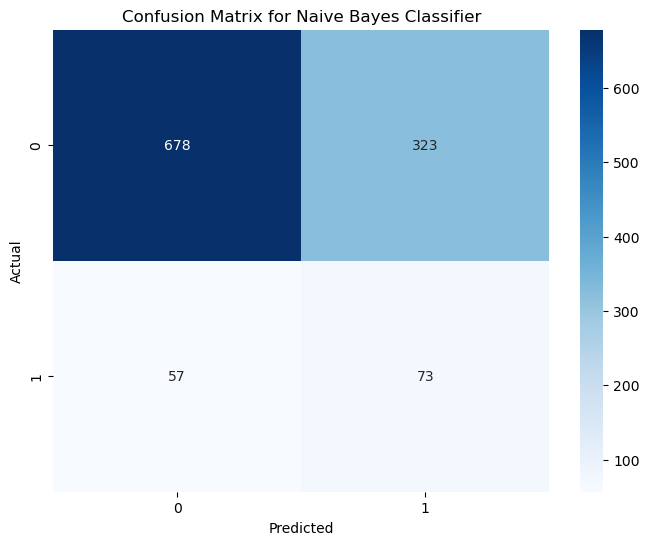

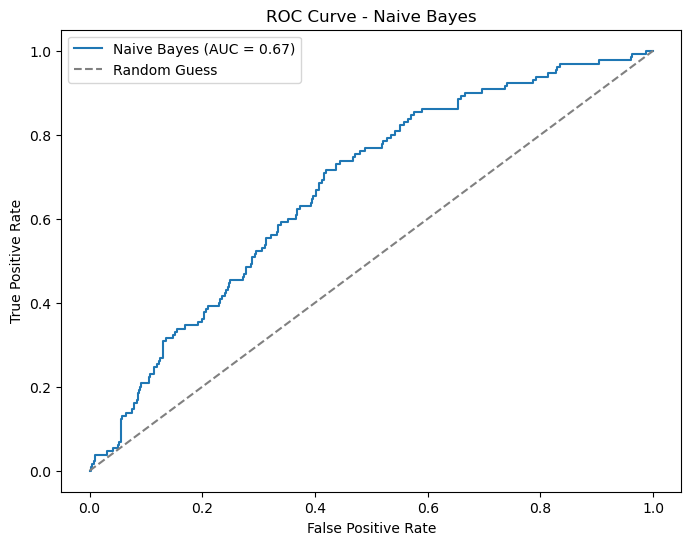


Cross-validated AUC scores: [0.71969086 0.66396812 0.68374834 0.67160005 0.69227388]
Mean AUC score: 0.6862562492452603

Cross-validated Accuracy scores: [0.66813187 0.61758242 0.64285714 0.61428571 0.62747253]
Mean Accuracy score: 0.634065934065934

Cross-validated Precision scores: [0.66037736 0.6196868  0.64130435 0.63       0.66111111]
Mean Precision score: 0.6424959236645237

Cross-validated Recall scores: [0.69230769 0.60879121 0.64835165 0.55384615 0.52307692]
Mean Recall score: 0.6052747252747253

Cross-validated F1 scores: [0.67596567 0.61419069 0.64480874 0.58947368 0.58404908]
Mean F1 score: 0.6216975719463994

Cross-validated False Positive Rate (FPR) scores: [0.71969086 0.66396812 0.68374834 0.67160005 0.69227388]
Mean FPR score: 0.6862562492452603

Cross-validated FNR scores: [0.30769231 0.39120879 0.35164835 0.44615385 0.47692308]
Mean FNR score: 0.39472527472527474

Cross-validated Sensitivity scores: [0.69230769 0.60879121 0.64835165 0.55384615 0.52307692]
Mean Sensit

In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

def append_results(data, classifier, train_accuracy, test_accuracy, cv_auc_scores, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy, 'cross_val_mean': cv_auc_scores, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution - Original')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution - After SMOTE')
plt.show()

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_resampled, y_resampled)

nb_train_predictions = naive_bayes_model.predict(X_resampled)
nb_train_accuracy = accuracy_score(y_resampled, nb_train_predictions)

nb_test_predictions = naive_bayes_model.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)
nb_test_conf_matrix = confusion_matrix(y_test, nb_test_predictions)
nb_test_probabilities = naive_bayes_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, nb_test_probabilities)

tn, fp, fn, tp = nb_test_conf_matrix.ravel()
print('\nNaive Bayes Metrics on Test Set:')
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))

plt.figure(figsize=(8, 6))
sns.heatmap(nb_test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, nb_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

def fnr_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fnr = fn / (fn + tp)
    return fnr


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[1, 1] / (confusion_matrix(y, y_pred)[1, 1] + confusion_matrix(y, y_pred)[1, 0]))
specificity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[0, 0] / (confusion_matrix(y, y_pred)[0, 0] + confusion_matrix(y, y_pred)[0, 1]))
cv_probabilities = cross_val_predict(naive_bayes_model, X_resampled, y_resampled, cv=kfold, method='predict_proba')
cv_auc_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring='roc_auc')
cv_accuracy_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
cv_precision_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring='precision')
cv_recall_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring='recall')
cv_f1_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring='f1')
cv_fpr_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring='roc_auc', n_jobs=-1)
cv_fnr_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring=make_scorer(fnr_scorer))
cv_sensitivity_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring=sensitivity_scorer)
cv_specificity_scores = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=kfold, scoring=specificity_scorer)


print("\nCross-validated AUC scores:", cv_auc_scores)
print("Mean AUC score:", cv_auc_scores.mean())
print("\nCross-validated Accuracy scores:", cv_accuracy_scores)
print("Mean Accuracy score:", cv_accuracy_scores.mean())
print("\nCross-validated Precision scores:", cv_precision_scores)
print("Mean Precision score:", cv_precision_scores.mean())
print("\nCross-validated Recall scores:", cv_recall_scores)
print("Mean Recall score:", cv_recall_scores.mean())
print("\nCross-validated F1 scores:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean())
print("\nCross-validated False Positive Rate (FPR) scores:", cv_fpr_scores)
print("Mean FPR score:", cv_fpr_scores.mean())
print("\nCross-validated FNR scores:", cv_fnr_scores)
print("Mean FNR score:", np.mean(cv_fnr_scores))
print("\nCross-validated Sensitivity scores:", cv_sensitivity_scores)
print("Mean Sensitivity score:", cv_sensitivity_scores.mean())
print("\nCross-validated Specificity scores:", cv_specificity_scores)
print("Mean Specificity score:", cv_specificity_scores.mean())


append_results('withsmote', 'Naive Bayes CV', nb_train_accuracy * 100, nb_test_accuracy * 100, cv_auc_scores.mean() * 100, auc_score,
               cv_sensitivity_scores.mean(), cv_specificity_scores.mean(),cv_f1_scores.mean()
             , cv_precision_scores.mean(),
               np.mean(tn / (tn + fn)),np.mean(cv_fnr_scores),
               cv_fpr_scores.mean(), (fp / (fp + tp)),
               (fn / (fn + tn)))


results_df = pd.DataFrame(results_list)


Random Forest Training Accuracy: 100.0
Confusion Matrix for Random Forest on Training Set:
[[2275    0]
 [   0  361]]

Random Forest Test Accuracy: 88.50574712643679
Confusion Matrix for Random Forest on Test Set:
[[627  28]
 [ 89  10]]
Sensitivity: 0.10101010101010101
Specificity: 0.9572519083969465
Accuracy: 0.8448275862068966
F1 Score: 0.145985401459854
Precision: 0.2631578947368421
Negative Predicted Rate: 0.8756983240223464
False Negative Rate: 0.898989898989899
False Positive Rate: 0.042748091603053436
False Discovery Rate: 0.7368421052631579
False Omission Rate: 0.12430167597765363


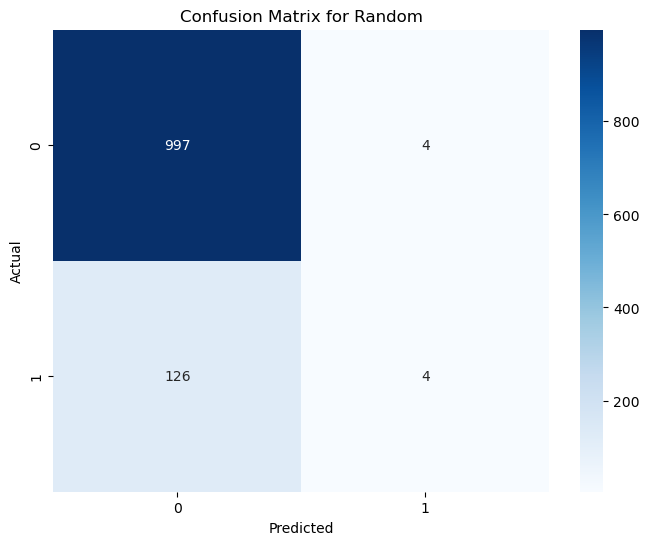

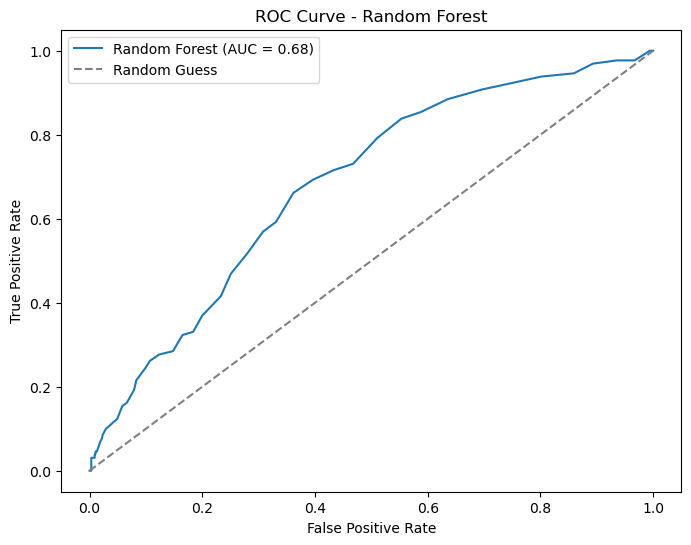

In [237]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt



def append_results(data, classifier, train_accuracy, test_accuracy, cv_auc_scores, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy, 'cross_val_mean': cv_auc_scores, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_train, y_train)

rf_train_predictions = random_forest_model.predict(X_train)
rf_test_predictions = random_forest_model.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print("Random Forest Training Accuracy:", rf_train_accuracy * 100)
rf_train_conf_matrix = confusion_matrix(y_train, rf_train_predictions)
print("Confusion Matrix for Random Forest on Training Set:")
print(rf_train_conf_matrix)

rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print("\nRandom Forest Test Accuracy:", rf_test_accuracy * 100)
rf_test_conf_matrix_ = confusion_matrix(y_test, rf_test_predictions)
print("Confusion Matrix for Random Forest on Test Set:")
print(rf_test_conf_matrix)

 
rf_test_probabilities = random_forest_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, rf_test_probabilities)

tn, fp, fn, tp = rf_test_conf_matrix.ravel()
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))

plt.figure(figsize=(8, 6))
sns.heatmap(rf_test_conf_matrix_, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, rf_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

def fnr_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fnr = fn / (fn + tp)
    return fnr


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[1, 1] / (confusion_matrix(y, y_pred)[1, 1] + confusion_matrix(y, y_pred)[1, 0]))
specificity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[0, 0] / (confusion_matrix(y, y_pred)[0, 0] + confusion_matrix(y, y_pred)[0, 1]))
cv_probabilities = cross_val_predict(random_forest_model, X_train, y_train, cv=kfold, method='predict_proba')
cv_auc_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='roc_auc')
cv_accuracy_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='accuracy')
cv_precision_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='precision')
cv_recall_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='recall')
cv_f1_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='f1')
cv_fpr_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
cv_fnr_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring=make_scorer(fnr_scorer))
cv_sensitivity_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring=sensitivity_scorer)
cv_specificity_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring=specificity_scorer)


append_results('withoutsmote', 'Random Forest CV', rf_train_accuracy * 100, rf_test_accuracy * 100, cv_auc_scores.mean() * 100, auc_score,
               cv_sensitivity_scores.mean(), cv_specificity_scores.mean(), cv_f1_scores.mean(),
               cv_precision_scores.mean(), np.mean(tn / (tn + fn)), np.mean(cv_fnr_scores),
               cv_fpr_scores.mean(), (fp / (fp + tp)), (fn / (fn + tn)))


results_df = pd.DataFrame(results_list)


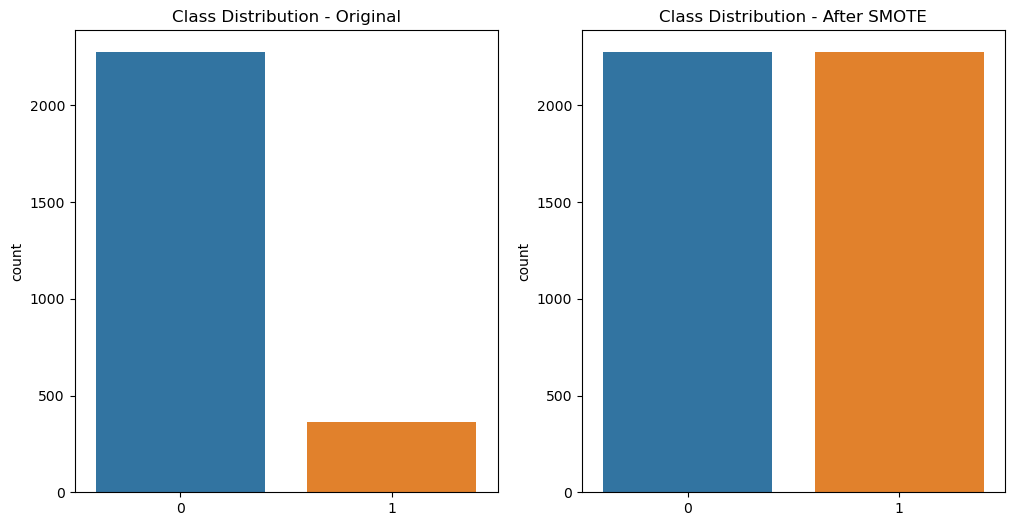

Random Forest Training Accuracy: 100.0

Random Forest Test Accuracy: 85.85322723253758
Confusion Matrix for Random Forest on Test Set:
[[627  28]
 [ 89  10]]
Sensitivity: 0.09230769230769231
Specificity: 0.958041958041958
Accuracy: 0.8585322723253758
F1 Score: 0.13043478260869565
Precision: 0.2222222222222222
Negative Predicted Rate: 0.8904363974001857
False Negative Rate: 0.9076923076923077
False Positive Rate: 0.04195804195804196
False Discovery Rate: 0.7777777777777778
False Omission Rate: 0.1095636025998143


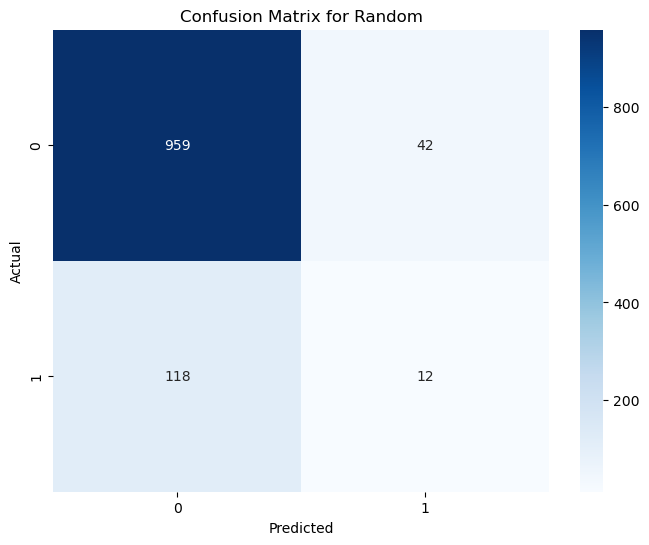

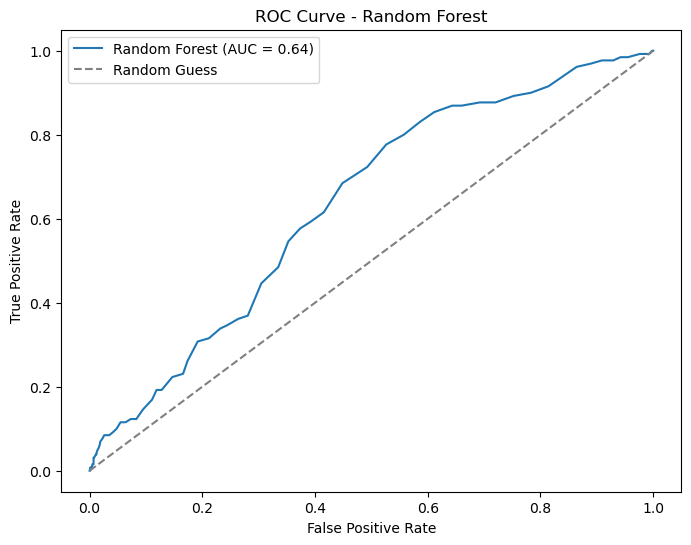

In [238]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE  # Assuming you're using SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


 
def append_results(data, classifier, train_accuracy, test_accuracy, cv_auc_scores, auc_score, sensitivity, specificity, f1_score,
                   precision, npv, fnr, fpr, fdr, forr): 
    results_list.append({'Classifier': classifier, 'Data': data, 'train_Accuracy': train_accuracy,
                         'test_accuracy': test_accuracy, 'cross_val_mean': cv_auc_scores, 'AUC Score': auc_score,
                         'Sensitivity': sensitivity, 'Specificity': specificity, 'F1 Score': f1_score,
                         'Precision': precision, 'Negative Predictive Value': npv,
                         'False Negative Rate': fnr, 'False Positive Rate': fpr,
                         'False Discovery Rate': fdr, 'False Omission Rate': forr})

# Assuming you have defined your X and y
# X should contain your features and y should contain your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution before and after SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution - Original')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Class Distribution - After SMOTE')
plt.show()

# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=20)
random_forest_model.fit(X_resampled, y_resampled)

# Evaluate Random Forest model on training set
rf_train_predictions = random_forest_model.predict(X_resampled)
rf_train_accuracy = accuracy_score(y_resampled, rf_train_predictions)
print("Random Forest Training Accuracy:", rf_train_accuracy*100)

# Evaluate Random Forest model on testing set
rf_test_predictions = random_forest_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_conf_matrix_ = confusion_matrix(y_test, rf_test_predictions)
print("\nRandom Forest Test Accuracy:", rf_test_accuracy * 100)
print("Confusion Matrix for Random Forest on Test Set:")
print(rf_test_conf_matrix)

 
rf_test_probabilities = random_forest_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, rf_test_probabilities)

tn, fp, fn, tp = rf_test_conf_matrix_.ravel()
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))

plt.figure(figsize=(8, 6))
sns.heatmap(rf_test_conf_matrix_, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, rf_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

def fnr_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fnr = fn / (fn + tp)
    return fnr


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sensitivity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[1, 1] / (confusion_matrix(y, y_pred)[1, 1] + confusion_matrix(y, y_pred)[1, 0]))
specificity_scorer = make_scorer(lambda y, y_pred: confusion_matrix(y, y_pred)[0, 0] / (confusion_matrix(y, y_pred)[0, 0] + confusion_matrix(y, y_pred)[0, 1]))
cv_probabilities = cross_val_predict(random_forest_model, X_train, y_train, cv=kfold, method='predict_proba')
cv_auc_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='roc_auc')
cv_accuracy_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='accuracy')
cv_precision_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='precision')
cv_recall_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='recall')
cv_f1_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='f1')
cv_fpr_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
cv_fnr_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring=make_scorer(fnr_scorer))
cv_sensitivity_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring=sensitivity_scorer)
cv_specificity_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring=specificity_scorer)

# Append results to the dataframe
append_results('withsmote', 'Random Forest CV', rf_train_accuracy * 100, rf_test_accuracy * 100, cv_accuracy_scores.mean()  * 100, auc_score,
               cv_sensitivity_scores.mean(), cv_specificity_scores.mean(), cv_f1_scores.mean(),
               cv_precision_scores.mean(), np.mean(tn / (tn + fn)), np.mean(cv_fnr_scores),
               cv_fpr_scores.mean(), (fp / (fp + tp)), (fn / (fn + tn)))

# Convert results to a DataFrame
results_df = pd.DataFrame(results_list)



SVM Training Accuracy: 86.30500758725341
Confusion Matrix for SVM on Training Set:
[[2275    0]
 [ 361    0]]

SVM Test Accuracy: 88.50574712643679
Confusion Matrix for SVM on Test Set:
[[1001    0]
 [ 130    0]]
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.8850574712643678
F1 Score: 0.0
Precision: nan
Negative Predicted Rate: 0.8850574712643678
False Negative Rate: 1.0
False Positive Rate: 0.0
False Discovery Rate: nan
False Omission Rate: 0.11494252873563218


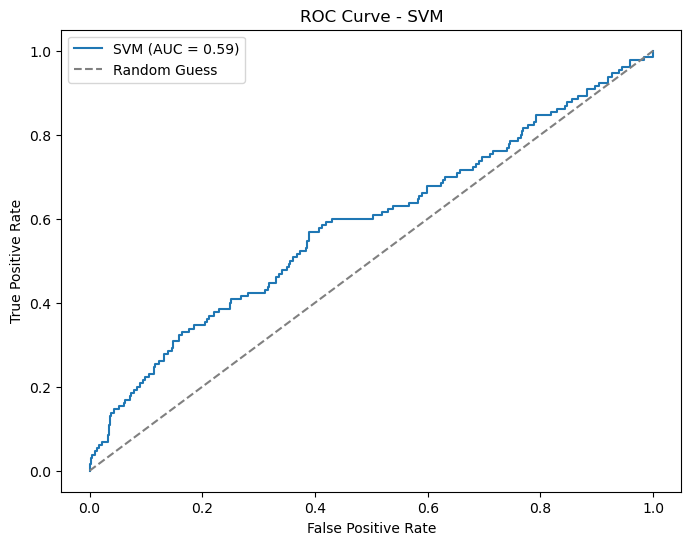

In [239]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=20)
svm_model.fit(X_train, y_train)
svm_train_predictions = svm_model.predict(X_train)
svm_test_predictions = svm_model.predict(X_test)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print("SVM Training Accuracy:", svm_train_accuracy * 100)
svm_train_conf_matrix = confusion_matrix(y_train, svm_train_predictions)
print("Confusion Matrix for SVM on Training Set:")
print(svm_train_conf_matrix)


svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print("\nSVM Test Accuracy:", svm_test_accuracy * 100)
svm_test_conf_matrix = confusion_matrix(y_test, svm_test_predictions)
print("Confusion Matrix for SVM on Test Set:")
print(svm_test_conf_matrix)
svm_test_probabilities = svm_model.predict_proba(X_test)[:, 1]
svm_auc_score = roc_auc_score(y_test, svm_test_probabilities)

tn, fp, fn, tp = svm_test_conf_matrix.ravel()
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))

fpr, tpr, thresholds = roc_curve(y_test, svm_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(svm_auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

cv_auc_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='roc_auc')
cv_accuracy_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='accuracy')
cv_precision_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='precision')
cv_recall_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='recall')
cv_f1_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='f1')
cv_fpr_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)
cv_fnr_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring=make_scorer(fnr_scorer))
cv_sensitivity_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring=sensitivity_scorer)
cv_specificity_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring=specificity_scorer)

append_results('withoutsmote', 'SVM CV', svm_train_accuracy * 100, svm_test_accuracy * 100, cv_auc_scores_svm.mean() * 100, svm_auc_score,
               cv_sensitivity_scores_svm.mean(), cv_specificity_scores_svm.mean(), cv_f1_scores_svm.mean(),
               cv_precision_scores_svm.mean(), np.mean(tn / (tn + fn)), np.mean(cv_fnr_scores_svm),
               cv_fpr_scores_svm.mean(), (fp / (fp + tp)), (fn / (fn + tn)))


results_df_svm = pd.DataFrame(results_list)

SVM Training Accuracy: 59.74962063732928
Confusion Matrix for SVM on Training Set:
[[1324  951]
 [ 110  251]]

SVM Test Accuracy: 63.395225464190986
Confusion Matrix for SVM on Test Set:
[[617 384]
 [ 30 100]]
Sensitivity: 0.7692307692307693
Specificity: 0.6163836163836164
Accuracy: 0.6339522546419099
F1 Score: 0.3257328990228013
Precision: 0.2066115702479339
Negative Predicted Rate: 0.9536321483771252
False Negative Rate: 0.23076923076923078
False Positive Rate: 0.3836163836163836
False Discovery Rate: 0.7933884297520661
False Omission Rate: 0.04636785162287481


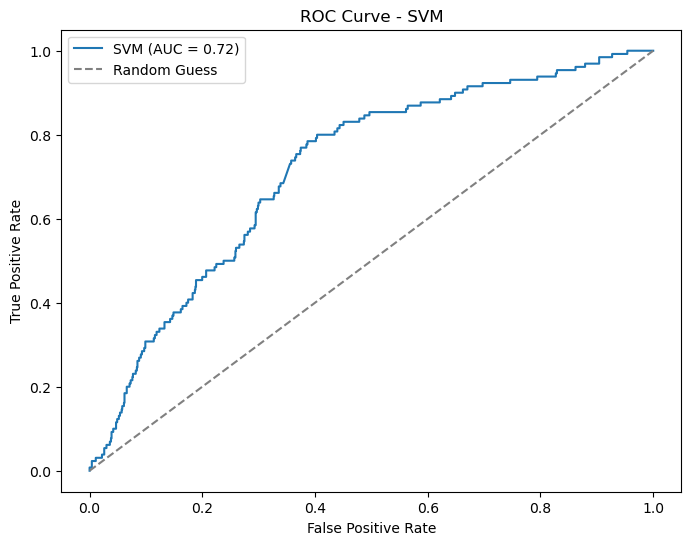

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
svm_model.fit(X_train_resampled, y_train_resampled)
svm_train_predictions = svm_model.predict(X_train)
svm_test_predictions = svm_model.predict(X_test)

svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print("SVM Training Accuracy:", svm_train_accuracy * 100)
svm_train_conf_matrix = confusion_matrix(y_train, svm_train_predictions)
print("Confusion Matrix for SVM on Training Set:")
print(svm_train_conf_matrix)

svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print("\nSVM Test Accuracy:", svm_test_accuracy * 100)
svm_test_conf_matrix = confusion_matrix(y_test, svm_test_predictions)
print("Confusion Matrix for SVM on Test Set:")
print(svm_test_conf_matrix)


svm_test_probabilities = svm_model.predict_proba(X_test)[:, 1]
svm_auc_score = roc_auc_score(y_test, svm_test_probabilities)
tn, fp, fn, tp = svm_test_conf_matrix.ravel()
print('Sensitivity:', (tp) / (tp + fn))
print('Specificity:', (tn) / (tn + fp))
print('Accuracy:', (tn + tp) / (tn + tp + fn + fp))
print('F1 Score:', (2 * tp) / (2 * tp + fp + fn))
print('Precision:', (tp) / (tp + fp))
print('Negative Predicted Rate:', (tn) / (tn + fn))
print('False Negative Rate:', (fn) / (fn + tp))
print('False Positive Rate:', (fp) / (fp + tn))
print('False Discovery Rate:', (fp) / (fp + tp))
print('False Omission Rate:', (fn) / (fn + tn))


fpr, tpr, thresholds = roc_curve(y_test, svm_test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(svm_auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


cv_auc_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc')
cv_accuracy_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')
cv_precision_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='precision')
cv_recall_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='recall')
cv_f1_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='f1')
cv_fpr_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='roc_auc', n_jobs=-1)
cv_fnr_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring=make_scorer(fnr_scorer))
cv_sensitivity_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring=sensitivity_scorer)
cv_specificity_scores_svm_smote = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=kfold, scoring=specificity_scorer)


append_results('withsmote', 'SVM CV (SMOTE)', svm_train_accuracy * 100, svm_test_accuracy * 100, cv_auc_scores_svm_smote.mean() * 100, svm_auc_score,
               cv_sensitivity_scores_svm_smote.mean(), cv_specificity_scores_svm_smote.mean(), cv_f1_scores_svm_smote.mean(),
               cv_precision_scores_svm_smote.mean(), np.mean(tn / (tn + fn)), np.mean(cv_fnr_scores_svm_smote),
               cv_fpr_scores_svm_smote.mean(), (fp / (fp + tp)), (fn / (fn + tn)))


results_df_svm_smote = pd.DataFrame(results_list)


In [ ]:
print("Results of Algorithms")
print(results_df)

In [ ]:
print(results_df_svm_smote)

In [ ]:
! pip install joblib
import joblib

rf_model =random_forest_model
joblib.dump(rf_model,"heart_model.pkl")
model=joblib.load("heart_model.pkl")

In [ ]:
print(results_df)